In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (8,6)}, style='ticks', context='notebook')

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [3]:
cars = pd.read_csv(r'C:\Users\USER\Desktop\adverts.csv')
cars.shape

(402005, 12)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  float64
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 34.1+ MB


# 1.0     Data Understanding and Exploration

# 1.1   Meaning and Type of Features; Analysis of Distributions

# 1.1.2     Analysis & Distribution of standard make

In [4]:
cars['standard_make'].value_counts(normalize=True).head(10)

BMW              0.092974
Audi             0.087760
Volkswagen       0.085188
Vauxhall         0.083830
Mercedes-Benz    0.079395
Nissan           0.049482
Toyota           0.043957
Peugeot          0.037713
Land Rover       0.036803
Renault          0.031893
Name: standard_make, dtype: float64

<AxesSubplot:>

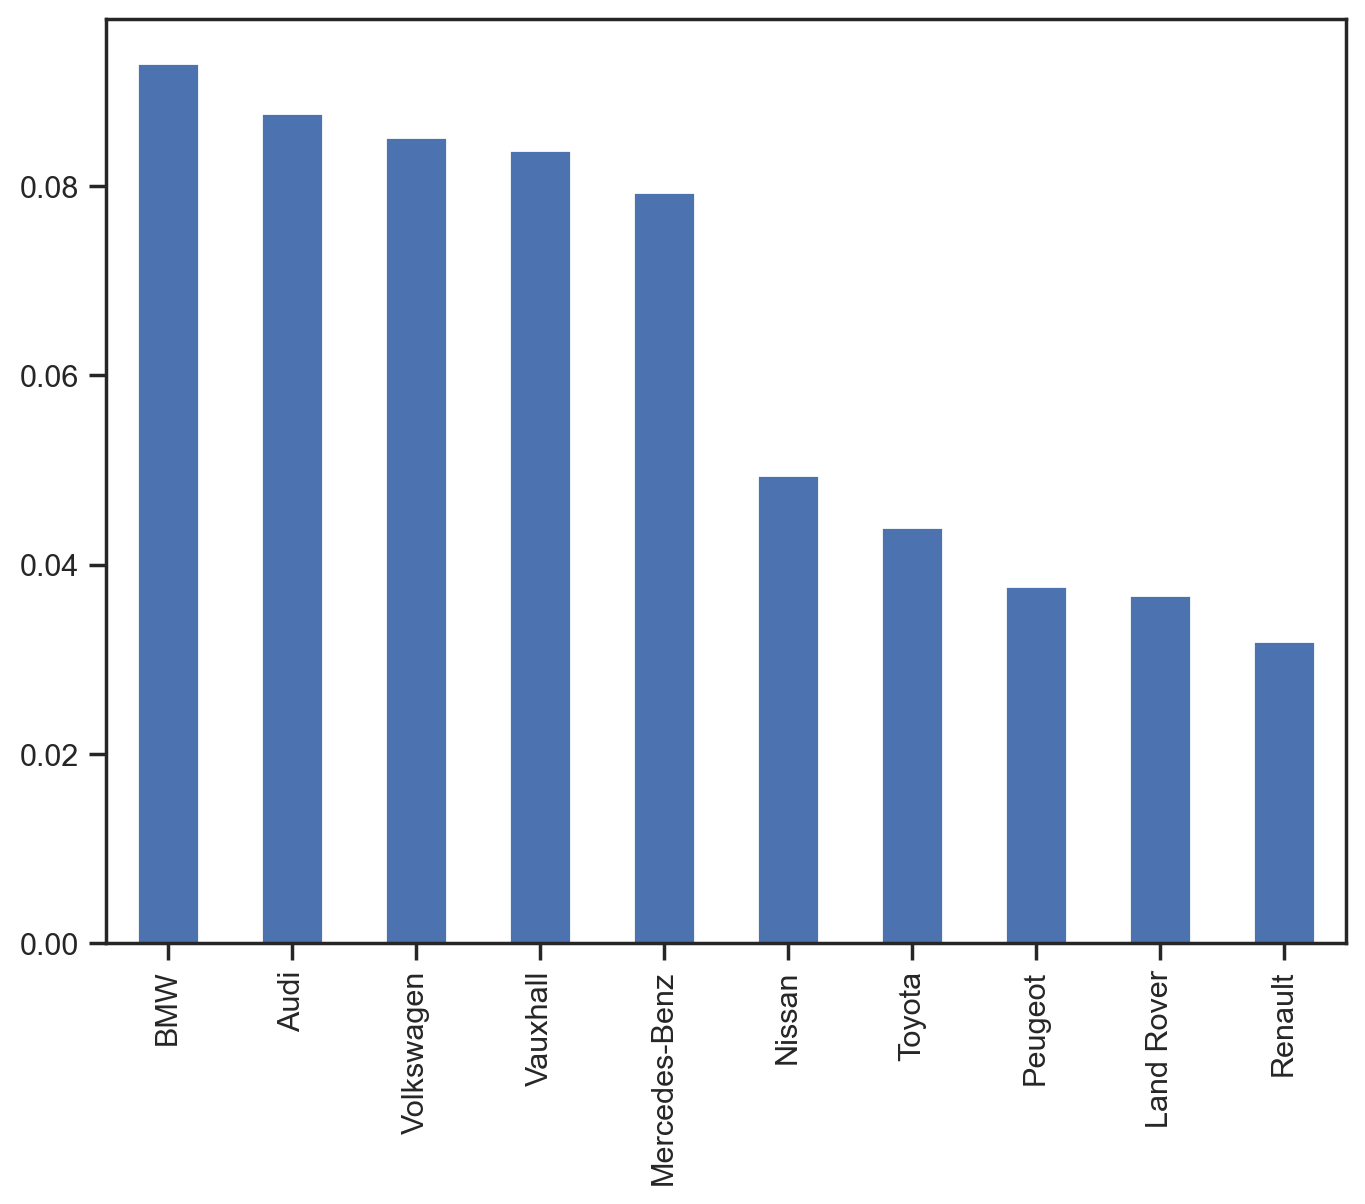

In [5]:
cars['standard_make'].value_counts(normalize=True).head(10).plot.bar()

<AxesSubplot:>

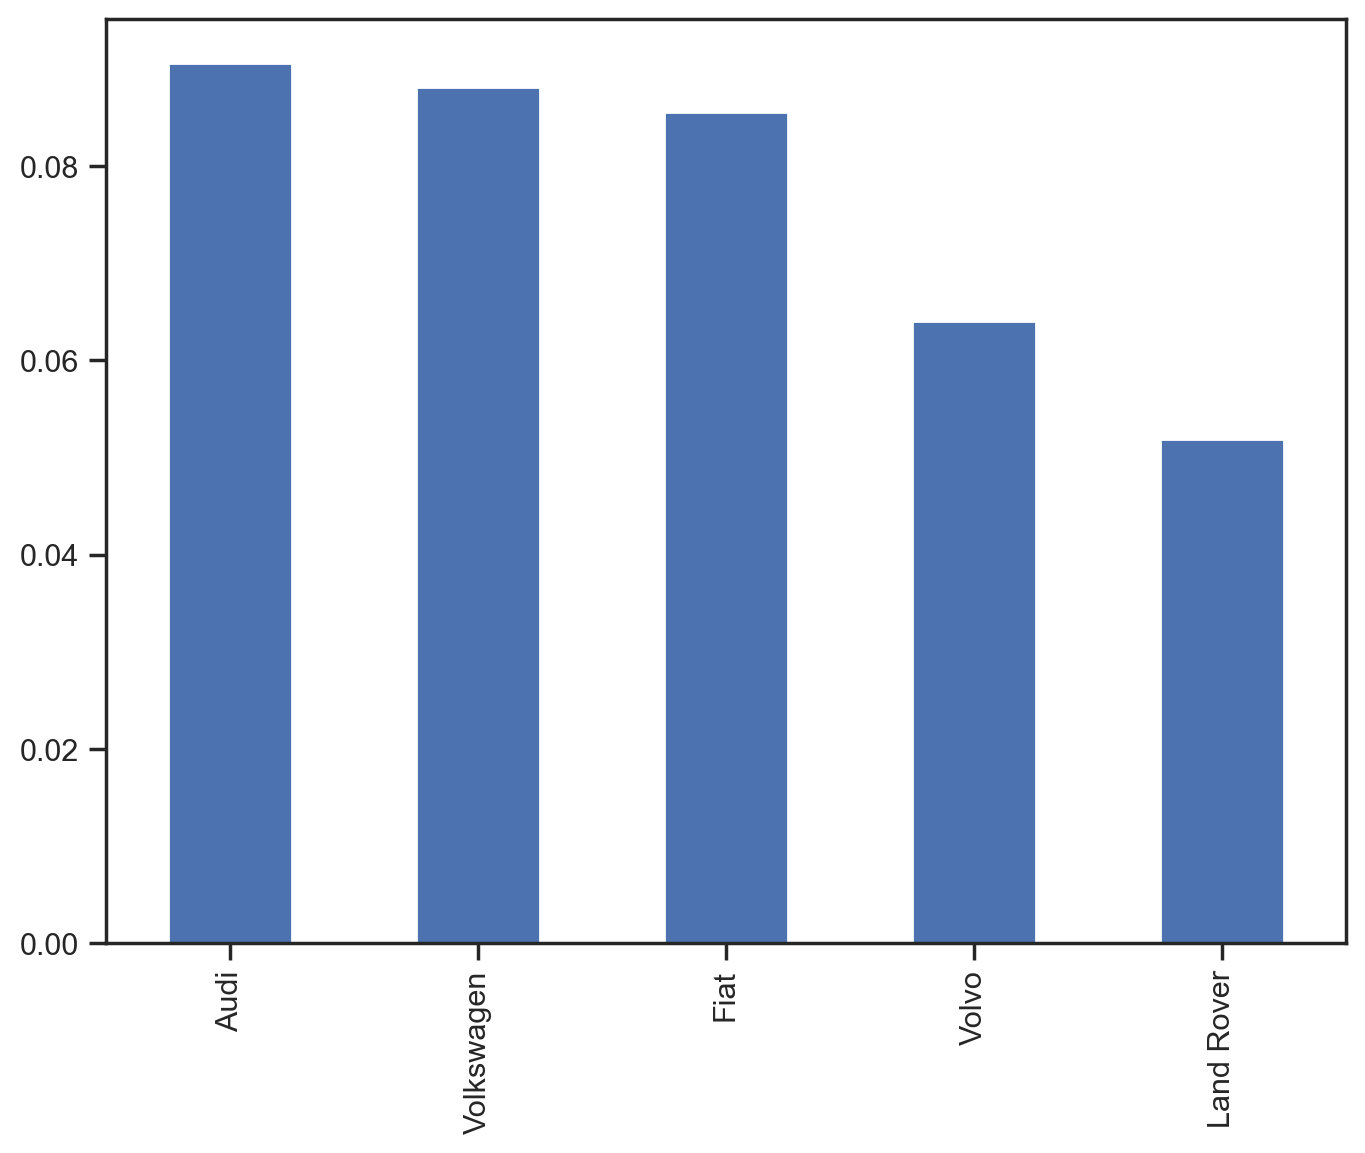

In [6]:
(cars.query("vehicle_condition == 'NEW'")
 ['standard_make'].value_counts(normalize=True)
 .head()
).plot.bar()

<AxesSubplot:>

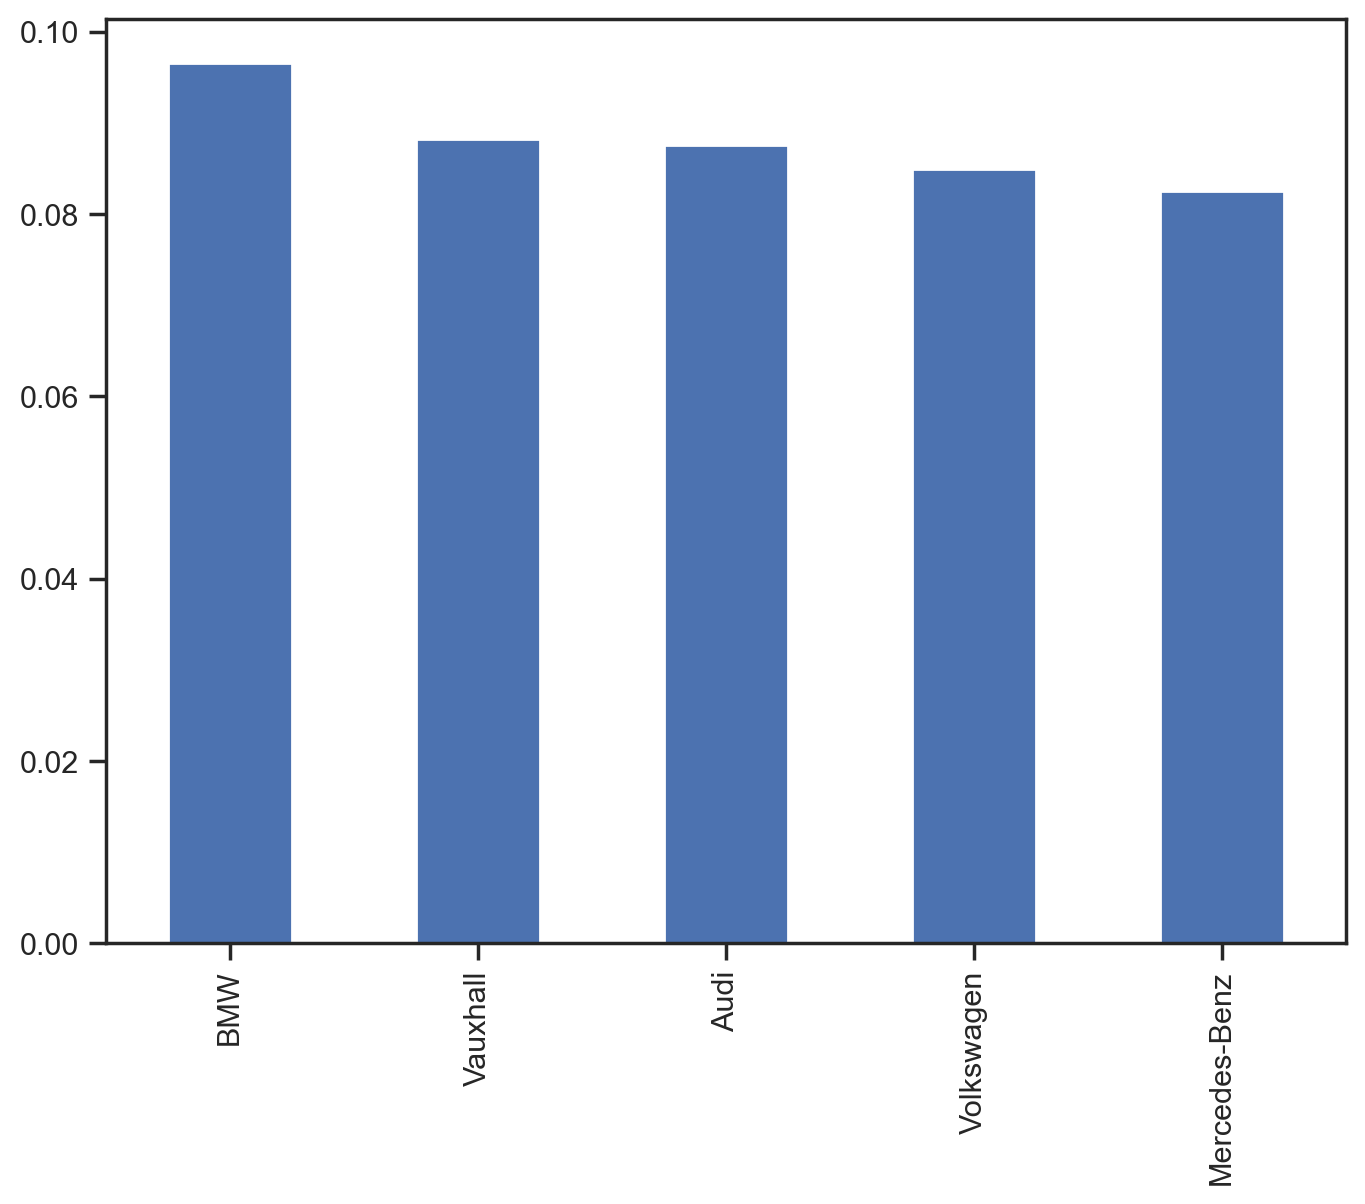

In [7]:
(
cars.query("vehicle_condition == 'USED'")
 ['standard_make'].value_counts(normalize=True)
 .head()
).plot.bar()

<AxesSubplot:xlabel='standard_make'>

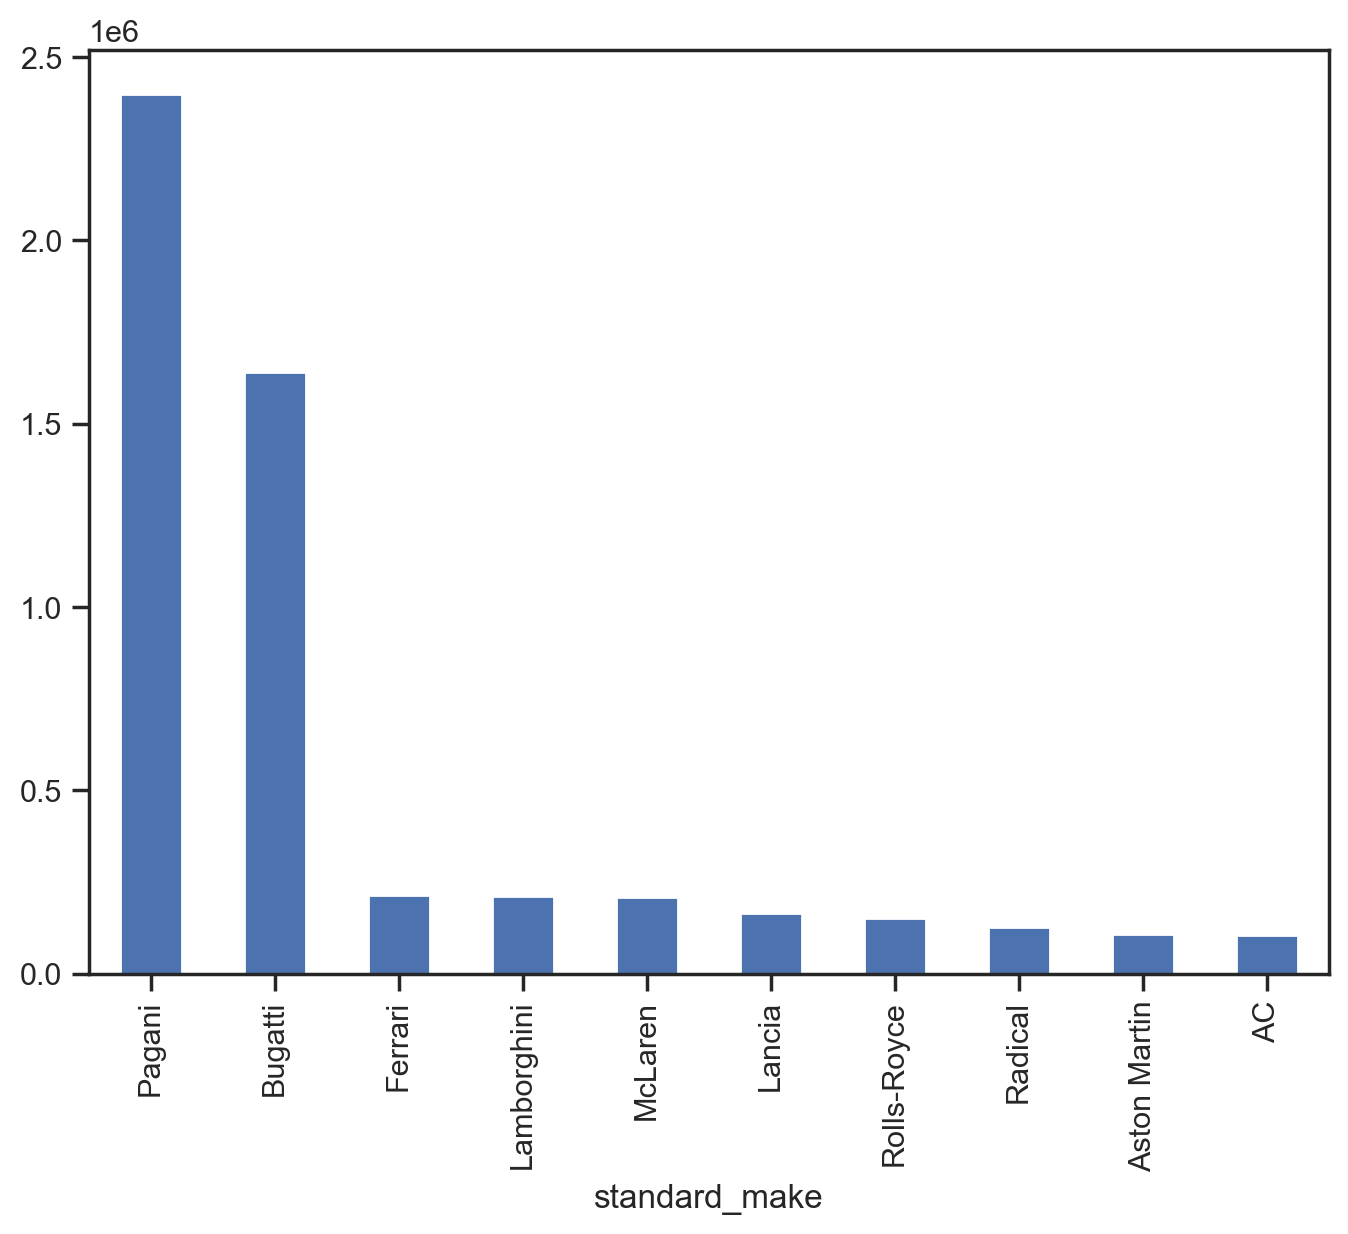

In [8]:
(cars.groupby('standard_make')['price'].mean()
 .sort_values(ascending=False).head(10).plot.bar()
)

# 1.1.3     Analysis & Distribution of Fuel Type

In [9]:
cars['fuel_type'].unique()

array(['Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid',
       'Petrol Hybrid', 'Electric', 'Diesel Plug-in Hybrid', nan,
       'Bi Fuel', 'Natural Gas'], dtype=object)

<AxesSubplot:>

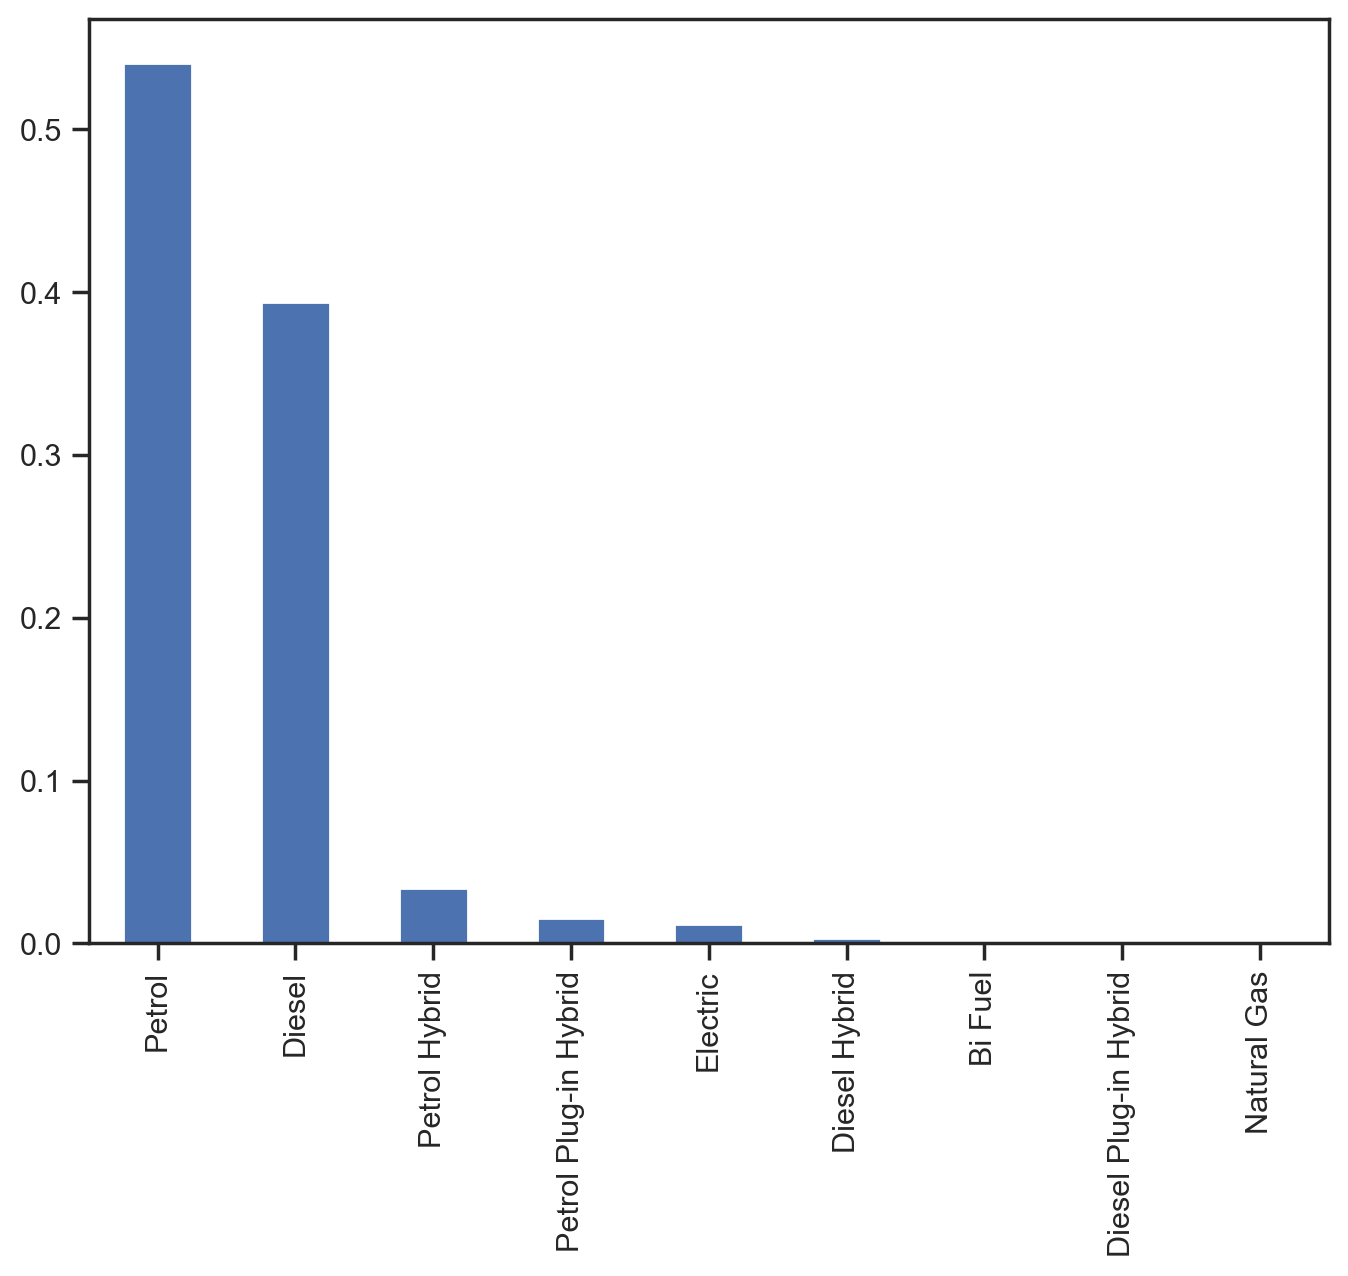

In [10]:
cars['fuel_type'].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

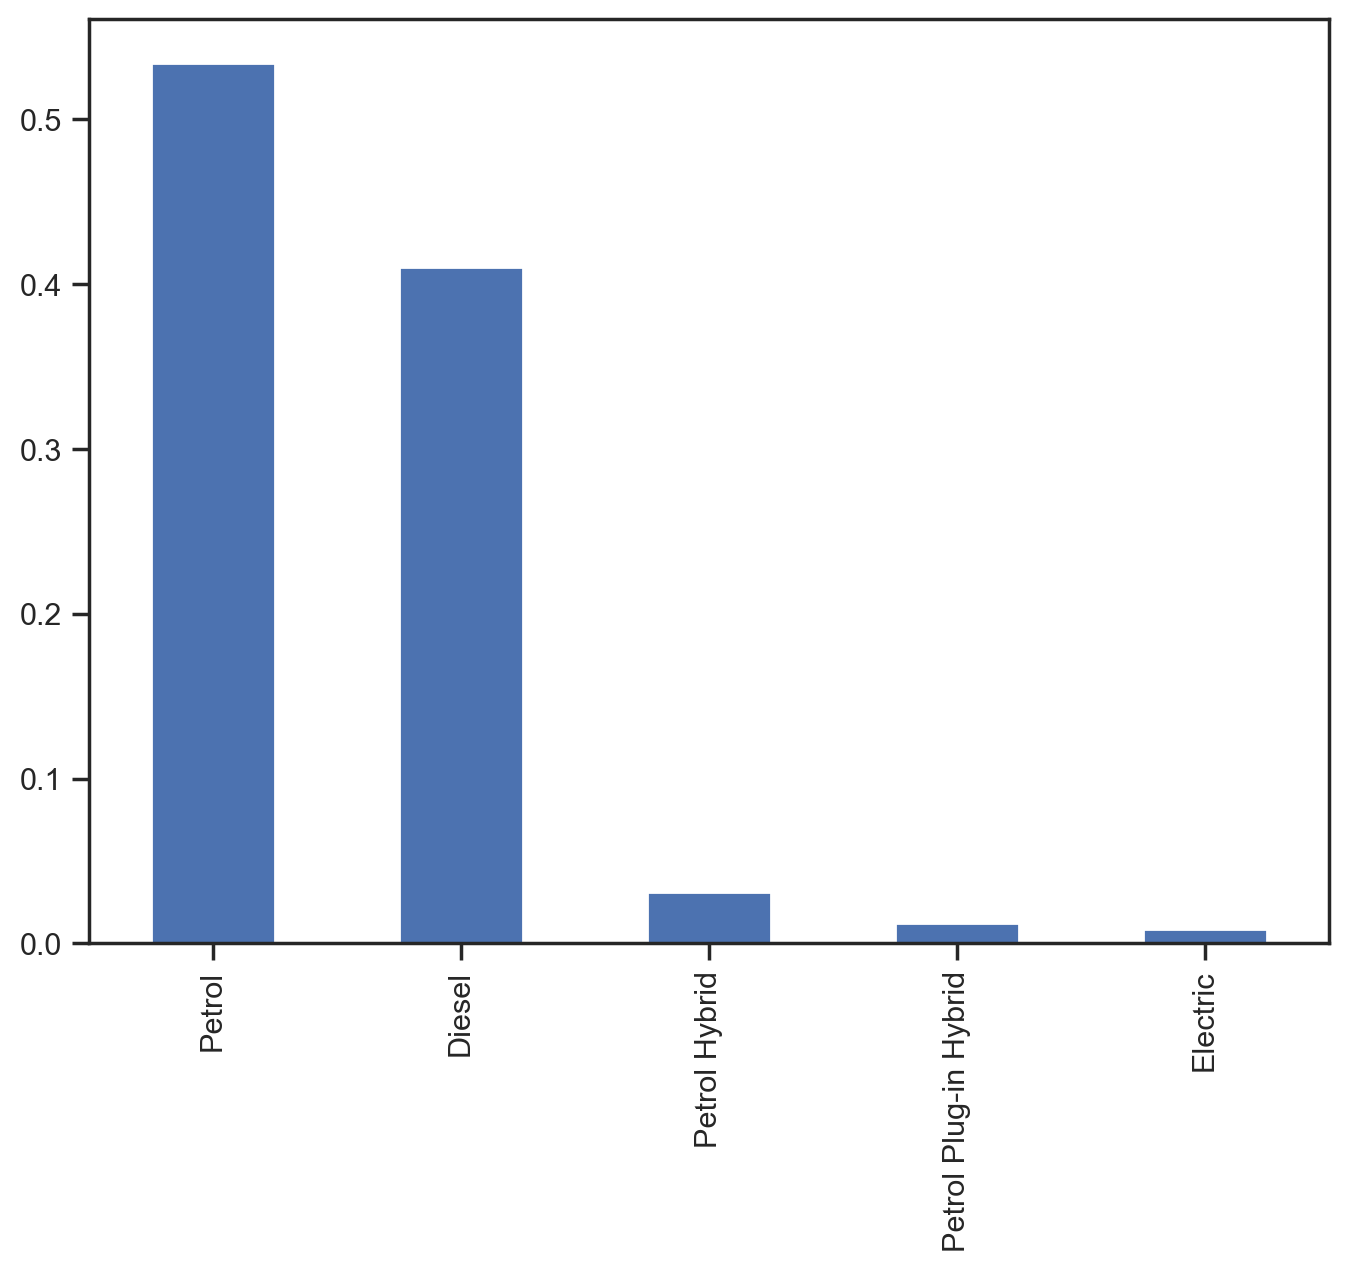

In [11]:
# Distribution of fuel type for used cars
(
cars.query("vehicle_condition == 'USED'")
 ['fuel_type'].value_counts(normalize=True).head()
).plot.bar()

<AxesSubplot:>

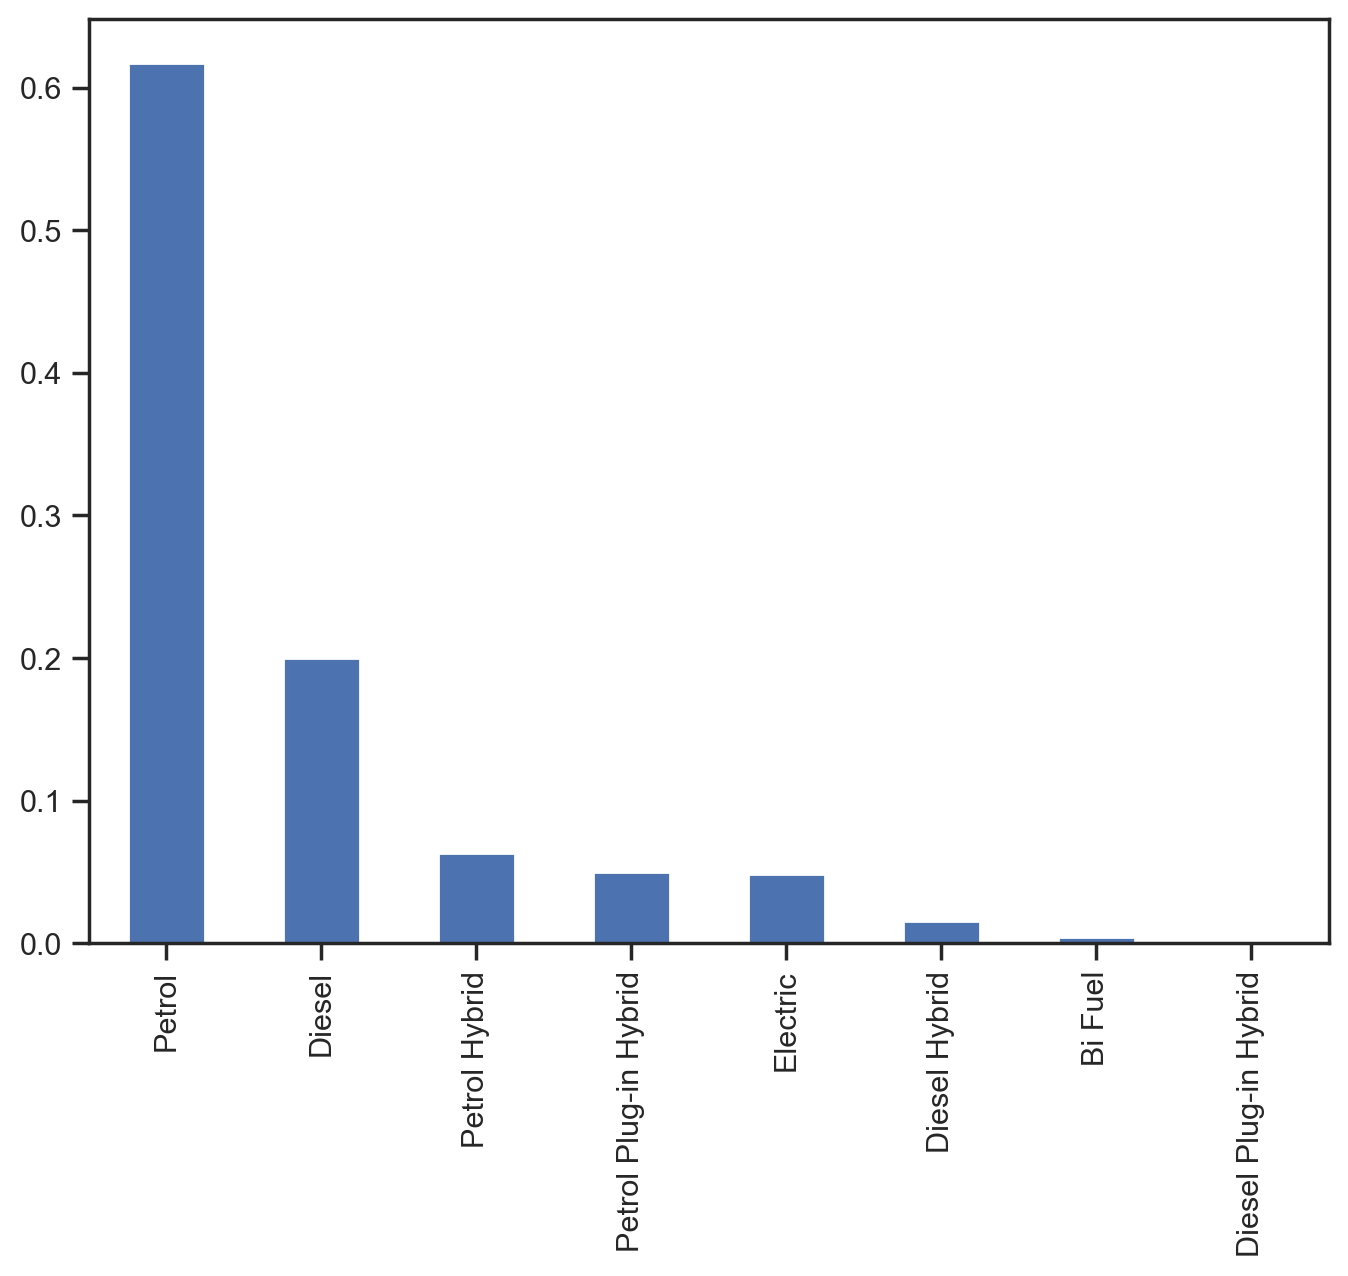

In [12]:
# Distribution of fuel type for New cars
(
cars.query("vehicle_condition == 'NEW'")
 ['fuel_type'].value_counts(normalize=True)
).plot.bar()

In [ ]:
cars.groupby('fuel_type')['price'].mean().sort_values(ascending=False)

# 1.1.4 Analysis & distribution of body type

In [13]:
cars['body_type'].unique()

array(['SUV', 'Saloon', 'Hatchback', 'Convertible', 'Limousine', 'Estate',
       'MPV', 'Coupe', nan, 'Pickup', 'Combi Van', 'Panel Van', 'Minibus',
       'Window Van', 'Camper', 'Car Derived Van', 'Chassis Cab'],
      dtype=object)

<AxesSubplot:>

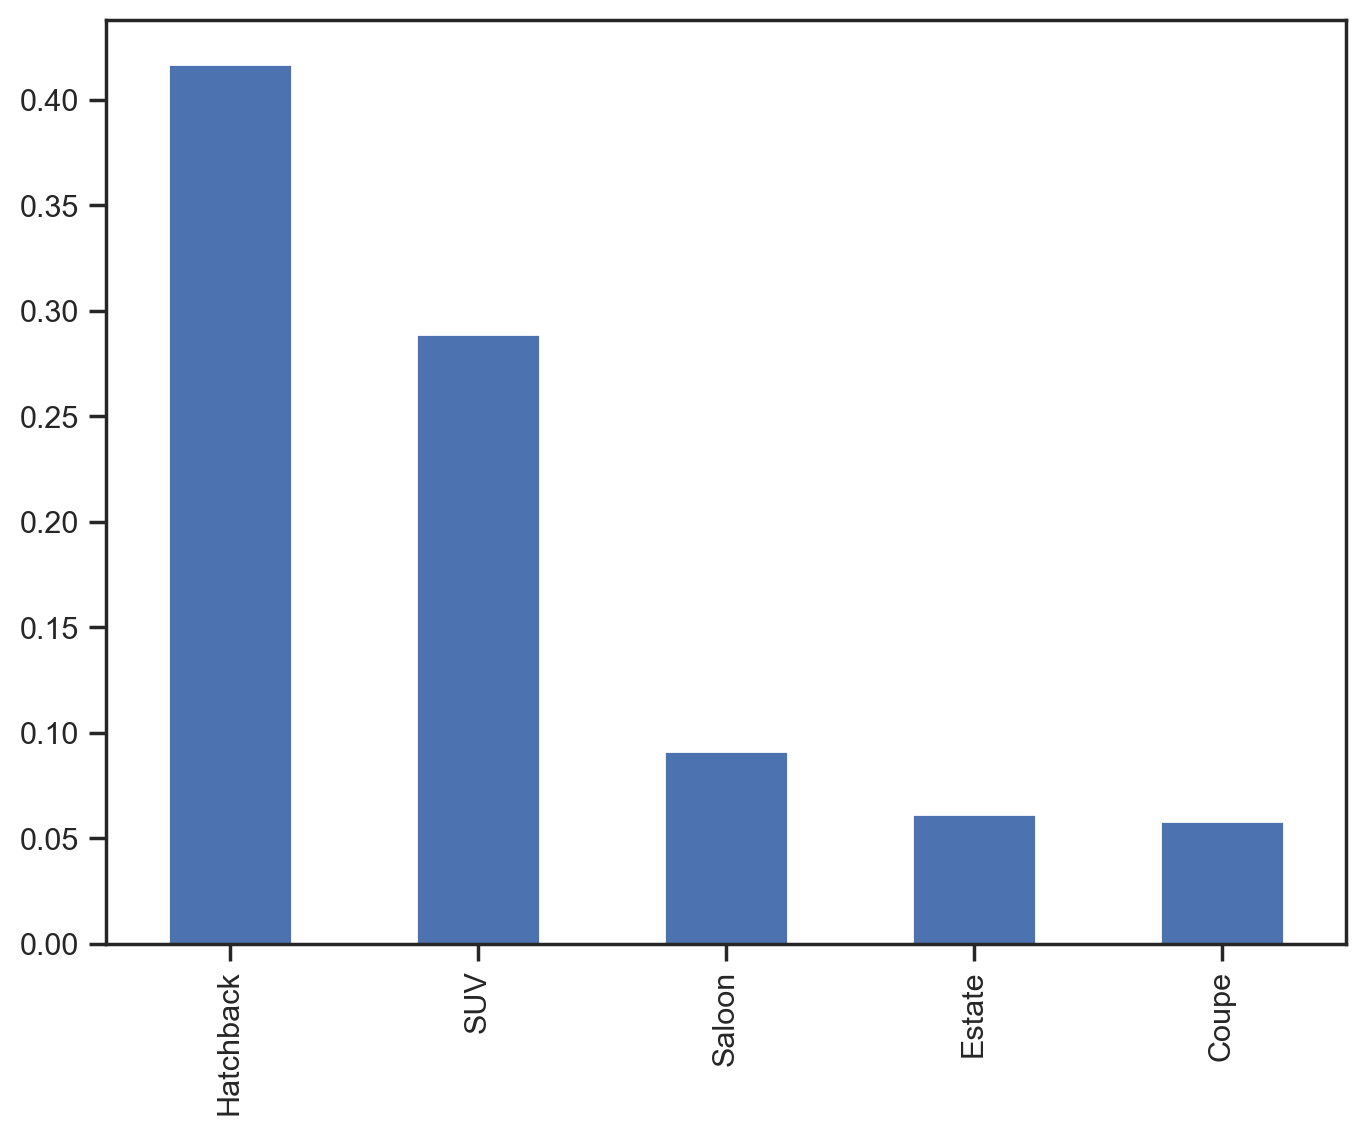

In [14]:
cars['body_type'].value_counts(normalize=True).head().plot.bar()

In [ ]:
cars.groupby('body_type')['price'].mean().sort_values(ascending=False)

# 1.2   Identification / Commenting on Missing Values

# Comment on missing values - Reg Codes

In [15]:
cars['reg_code'].isna().sum()

31857

In [16]:
(cars.loc[(cars['vehicle_condition']=='NEW') 
            & (cars['reg_code'].isna())]             
                      )[['reg_code','vehicle_condition']]

,reg_code,vehicle_condition
0,NaN,NEW
17,NaN,NEW
19,NaN,NEW
37,NaN,NEW
44,NaN,NEW
...,...,...
401860,NaN,NEW
401890,NaN,NEW
401902,NaN,NEW
401905,NaN,NEW


In [17]:
(cars.loc[(cars['vehicle_condition']=='USED') 
            & (cars['reg_code'].isna())]             
                      )[['reg_code','crossover_car_and_van']]

,reg_code,crossover_car_and_van
630,NaN,False
682,NaN,False
1131,NaN,False
1194,NaN,False
1335,NaN,False
...,...,...
397788,NaN,False
397947,NaN,False
398865,NaN,False
399728,NaN,False


# Comment on missing values - Year of Registration

In [18]:
cars['year_of_registration'].isna().sum()

33311

In [19]:
(cars.loc[(cars['vehicle_condition']=='NEW')                           
            & (cars['year_of_registration'].isna())]                   
                      )[['year_of_registration', 'vehicle_condition']]

,year_of_registration,vehicle_condition
0,NaN,NEW
17,NaN,NEW
19,NaN,NEW
37,NaN,NEW
44,NaN,NEW
...,...,...
401860,NaN,NEW
401890,NaN,NEW
401902,NaN,NEW
401905,NaN,NEW


In [20]:
(cars.loc[(cars['vehicle_condition']=='USED')                           
            & (cars['year_of_registration'].isna())]                   
                      )[['year_of_registration', 'vehicle_condition']]

,year_of_registration,vehicle_condition
54,NaN,USED
83,NaN,USED
865,NaN,USED
968,NaN,USED
1256,NaN,USED
...,...,...
400536,NaN,USED
400725,NaN,USED
401314,NaN,USED
401323,NaN,USED


# 1.3     Identification / Commenting on Outliers and Noise

# Comment on Outliers - Price

In [21]:
cars['price'].quantile(0.99)  # Check for 99th percentile of price 

88899.52000000025

In [22]:
cars[cars['price']>90000]['standard_make'].value_counts().head(10)

Ferrari          640
Porsche          601
Land Rover       460
Bentley          371
Lamborghini      301
Aston Martin     275
Mercedes-Benz    221
Audi             219
Rolls-Royce      205
McLaren          180
Name: standard_make, dtype: int64

In [24]:
cars[cars['price']>90000]['body_type'].value_counts().head(5)

Coupe          1590
SUV             893
Convertible     737
Saloon          243
Estate           85
Name: body_type, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

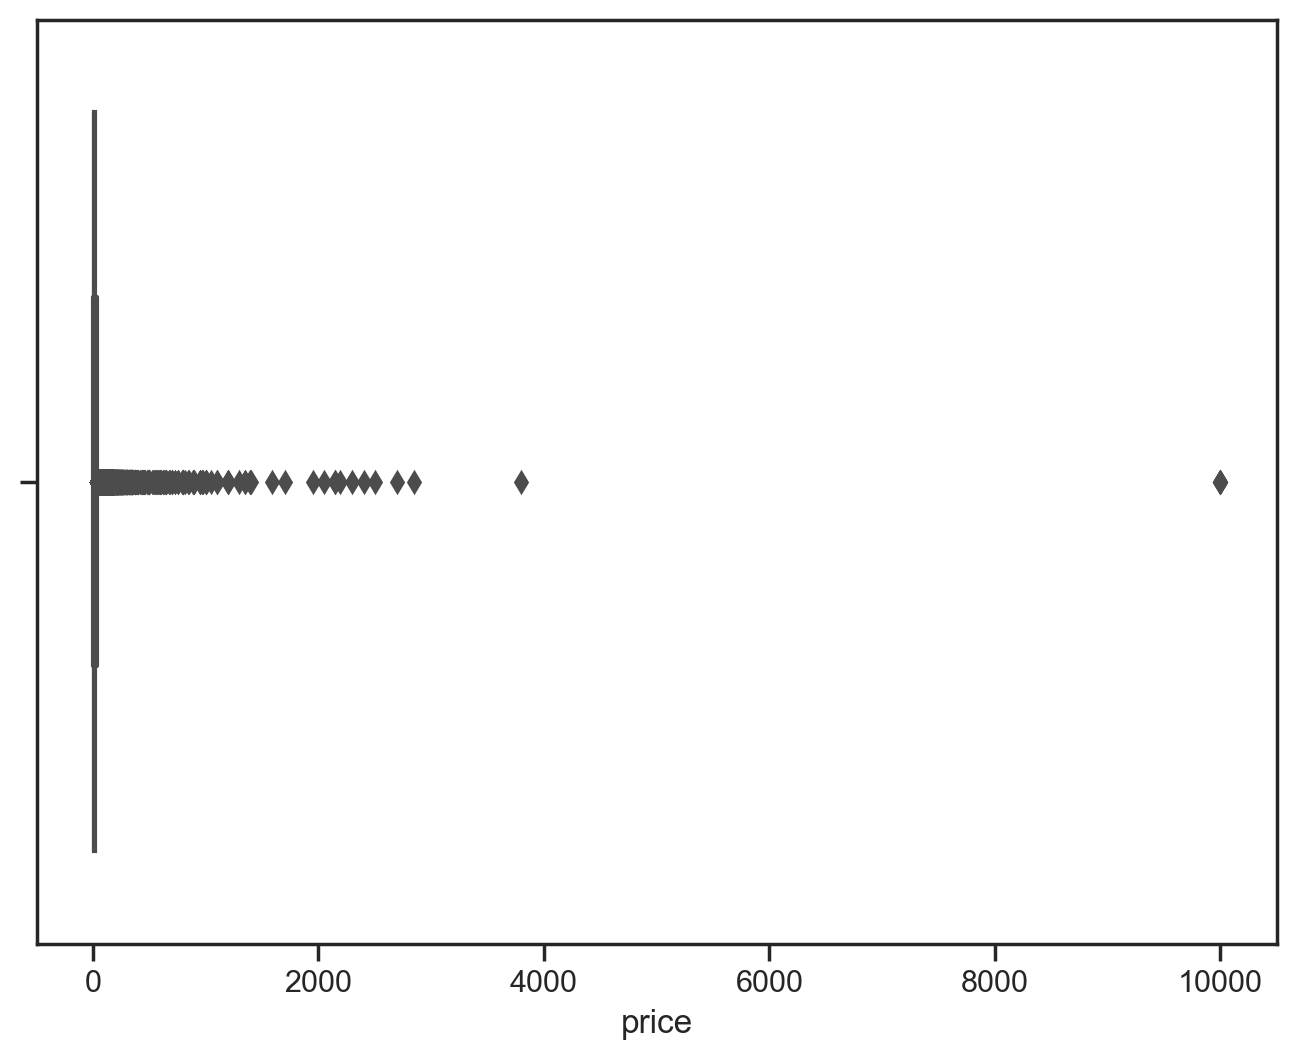

In [23]:
sns.boxplot(cars['price']/1000)

# Comment on Outliers - Mileage

In [24]:
cars['mileage'].describe()

count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64

In [25]:
cars['mileage'].quantile(0.99)  # Check for 99th percentile of mileage 

142000.0

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

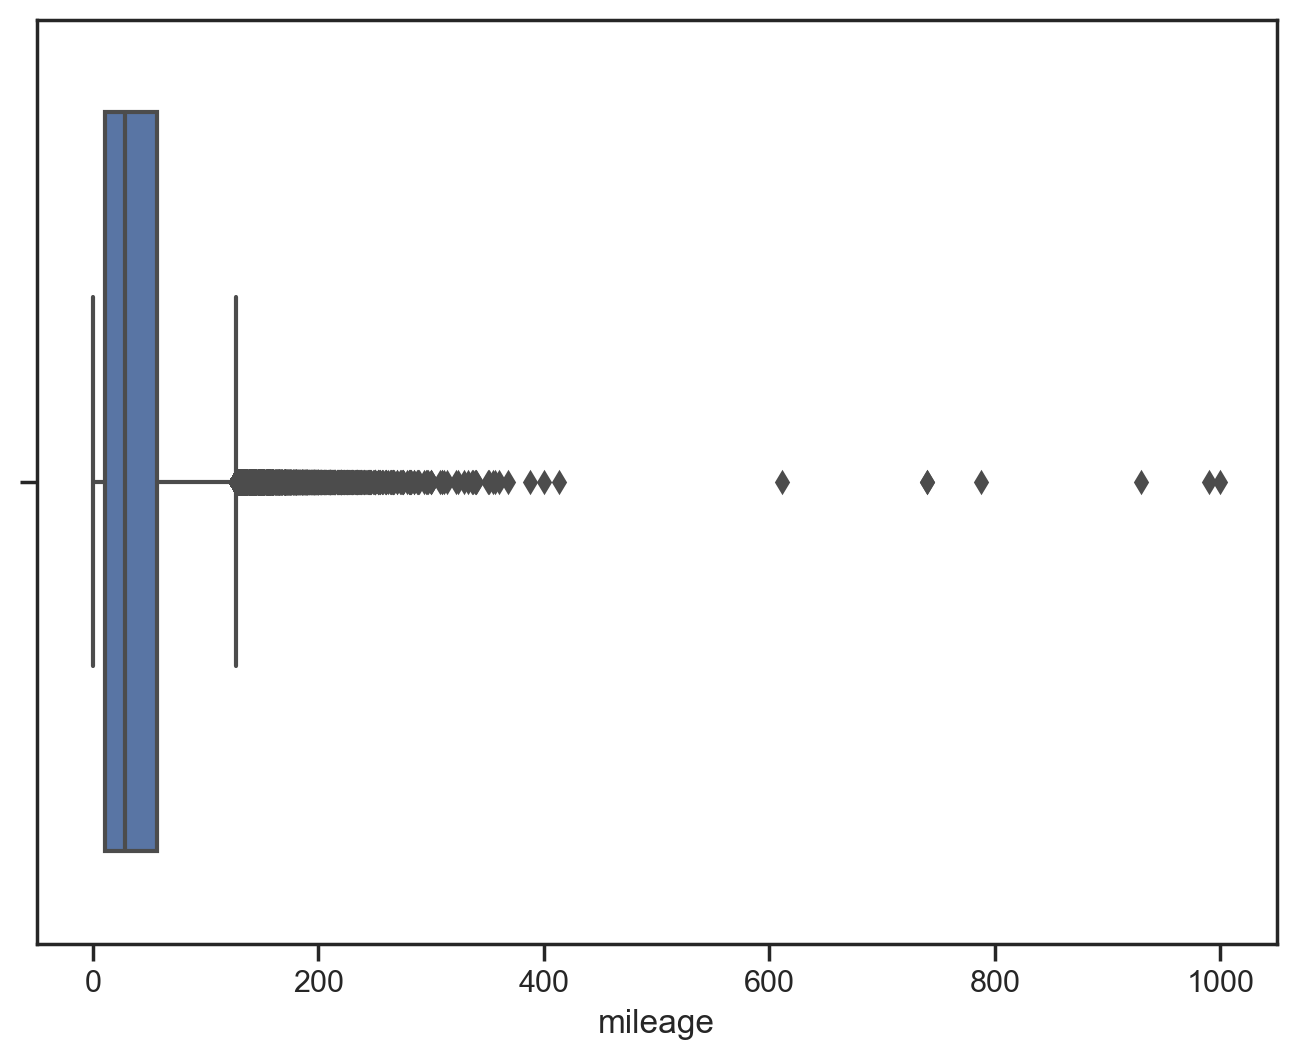

In [26]:
sns.boxplot(cars['mileage']/1000)

In [29]:
cars[cars['mileage']>142000]['standard_make'].value_counts(normalize=True).head(5)

BMW              0.143177
Volkswagen       0.119771
Audi             0.119024
Mercedes-Benz    0.104831
Toyota           0.069472
Name: standard_make, dtype: float64

# 2.0     Data Processing

# 2.1     Dealing with Missing Values, Outliers, and Noise

# Dealing with missing values (Year of Registration)

In [27]:
# It has been observed that all NEW cars have no values set for Year of Registration
# Will take a subset of this category of cars then assign the latest year 2021
# Years of registration are to be filled before working on missing values for Mileage

new_cars = (cars.loc[(cars['vehicle_condition']=='NEW') 
            & (cars['year_of_registration'].isna())]   
                      )
new_cars.shape                                          

(31249, 12)

In [28]:
current_year = 2021       # Create and instantiate a variable current year 

new_cars['year_of_registration'] = (
    new_cars['year_of_registration'].fillna(current_year) #Fill missing values
                                   )
new_cars.head(2)      # Confirm registration year for New Cars was updated

C:\Users\USER\AppData\Local\Temp\ipykernel_3452\144589358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cars['year_of_registration'] = (


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,2.020060e+14,0.0,NaN,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,False,Petrol Plug-in Hybrid
17,2.019110e+14,5.0,NaN,NaN,Nissan,X-Trail,NEW,2021.0,27595,SUV,False,Diesel


In [29]:
# Replace the subset (NEW Cars) on the main dataset (cars)

cars.loc[(cars['vehicle_condition']=='NEW')&(cars['year_of_registration'].isna())]=new_cars

In [30]:
# Fill missing values for year of registration with the median value for USed Cars

cars['year_of_registration'] = (cars['year_of_registration']
                              .fillna(cars['year_of_registration'].median())
                             )

In [31]:
cars['year_of_registration'] = cars['year_of_registration'].astype(int)
# cars['year_of_registration'].sort_values().unique()

# Deal with Noise - Year of registration

In [32]:
# Take a subset containing records with year of registration below 1900
# These includes: [1007,1515,1063,1009,1016,1010,1008,1018,999,1017,1006,1015]

noise_year=cars[cars['year_of_registration']<=1900]['year_of_registration'].unique()

noise_year

array([1007, 1515, 1063, 1009, 1016, 1010, 1008, 1018,  999, 1017, 1006,
       1015])

In [33]:
# Replace years classified as noise with the median / mode year on the dataset (2017)
cars['year_of_registration'] = cars['year_of_registration'].replace(noise_year, 2017)
#cars['year_of_registration'].unique().sort_values()

# 2.1.1     Dealing With the Missing Values for Mileage

In [34]:
# Mileage: is basically the total miles travelled since the car was registered. 
# TO fill in missing values, opted to group the dataset by year of registration 
# And take the mean value of mileage for each year to fill the missing mileage
# The below lambda expression was referenced from stackoverflow

cars['mileage'] = cars.groupby('year_of_registration')['mileage'].transform(
    lambda x: x.fillna(x.mean())
)

# 2.1.2     Dealing With the Outliers for Price

In [35]:
# Outliers are commonly handled using Tukey's Rule, also commonly known as the Inter Quantile Rule as shown below:

Q1 = cars['price'].quantile(0.25)   # Obtain 25th Percentile value of price from the dataset 
Q3 = cars['price'].quantile(0.75)   # Obtain 75th Percentile value of price from the dataset
IQR = Q3 - Q1                       # Calculate the inter quantile range (Q3 - Q1)
min_lim = Q1 - (1.5 * IQR)          # Calculate the lower boundary. Any values less than this is considered an outlier
max_lim = Q3 + (1.5 * IQR)          # Compute the upper boundary. Any values greater than this is considered an outlier
min_lim, max_lim, IQR, Q1, Q3       # Display lower, upper boundary, inter quantile range and 25th and 75th percentile

(-11262.5, 38757.5, 12505.0, 7495.0, 20000.0)

In [36]:
car_price = (cars.loc[(cars['price']<=max_lim) & (cars['year_of_registration']>=2001)])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

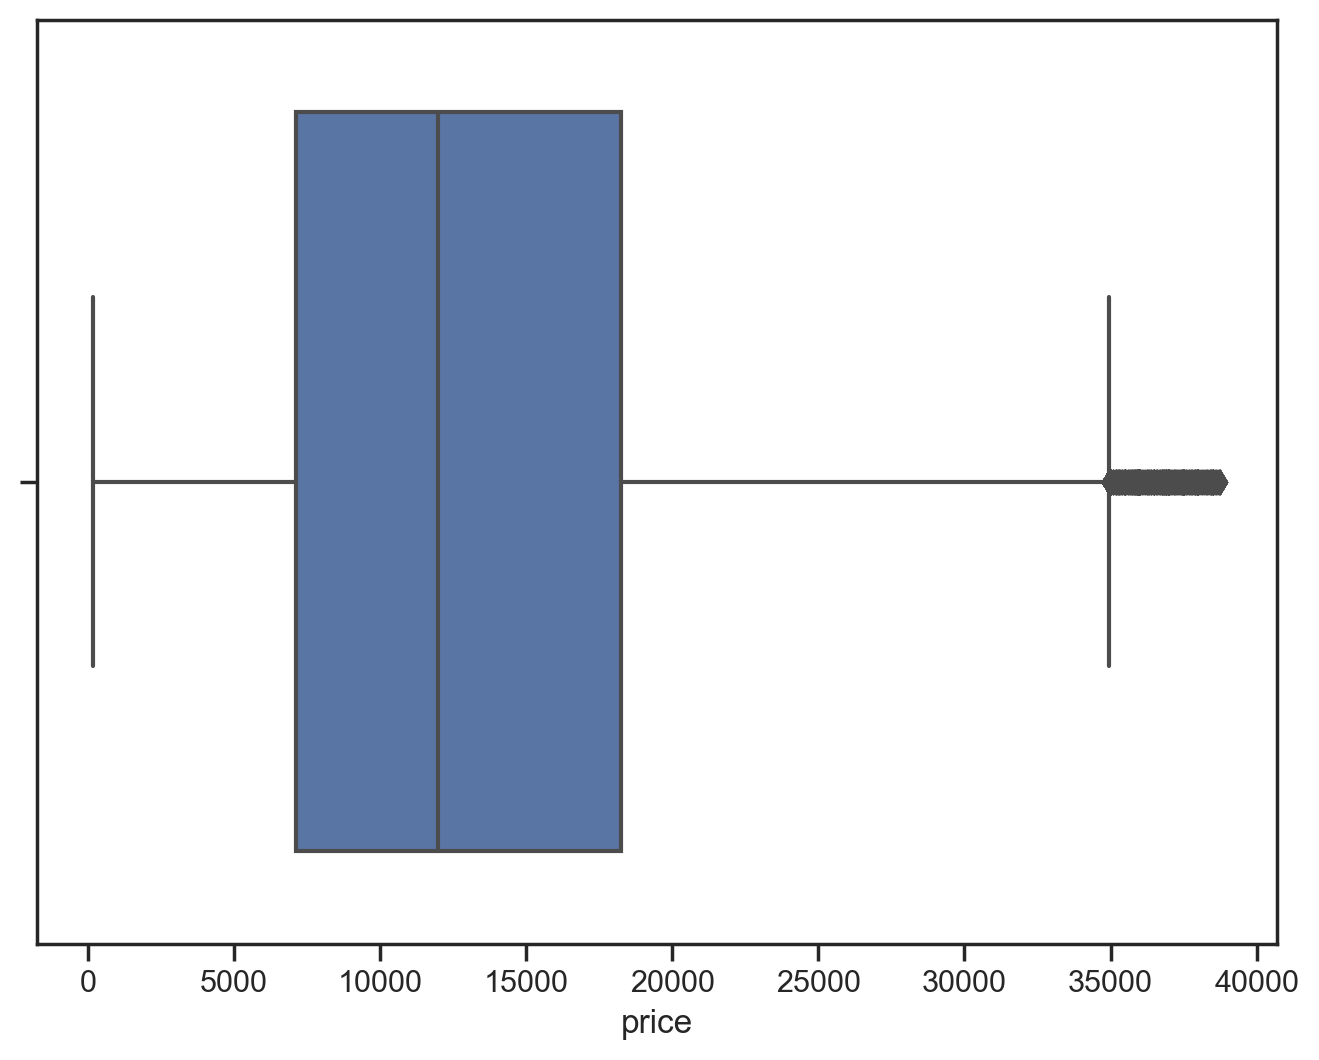

In [37]:
sns.boxplot(car_price['price'])     

In [38]:
car_price['price'].describe()

count    373605.000000
mean      13484.750472
std        8325.086664
min         180.000000
25%        7129.000000
50%       11990.000000
75%       18250.000000
max       38755.000000
Name: price, dtype: float64

# 2.1.3    Dealing With the Outliers for Mileage

In [39]:
Q_1 = cars['mileage'].quantile(0.25)
Q_3 = cars['mileage'].quantile(0.75)
IQRr = Q_3 - Q_1
min_lims = Q_1 - (1.5 * IQRr)
max_lims = Q_3 + (1.5 * IQRr)
min_lims, max_lims, IQRr, Q_1, Q_3

(-59118.5, 126477.5, 46399.0, 10480.0, 56879.0)

In [40]:
car_mileage = (cars.loc[(cars['mileage']<=max_lims) & (cars['year_of_registration']>=2001)])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

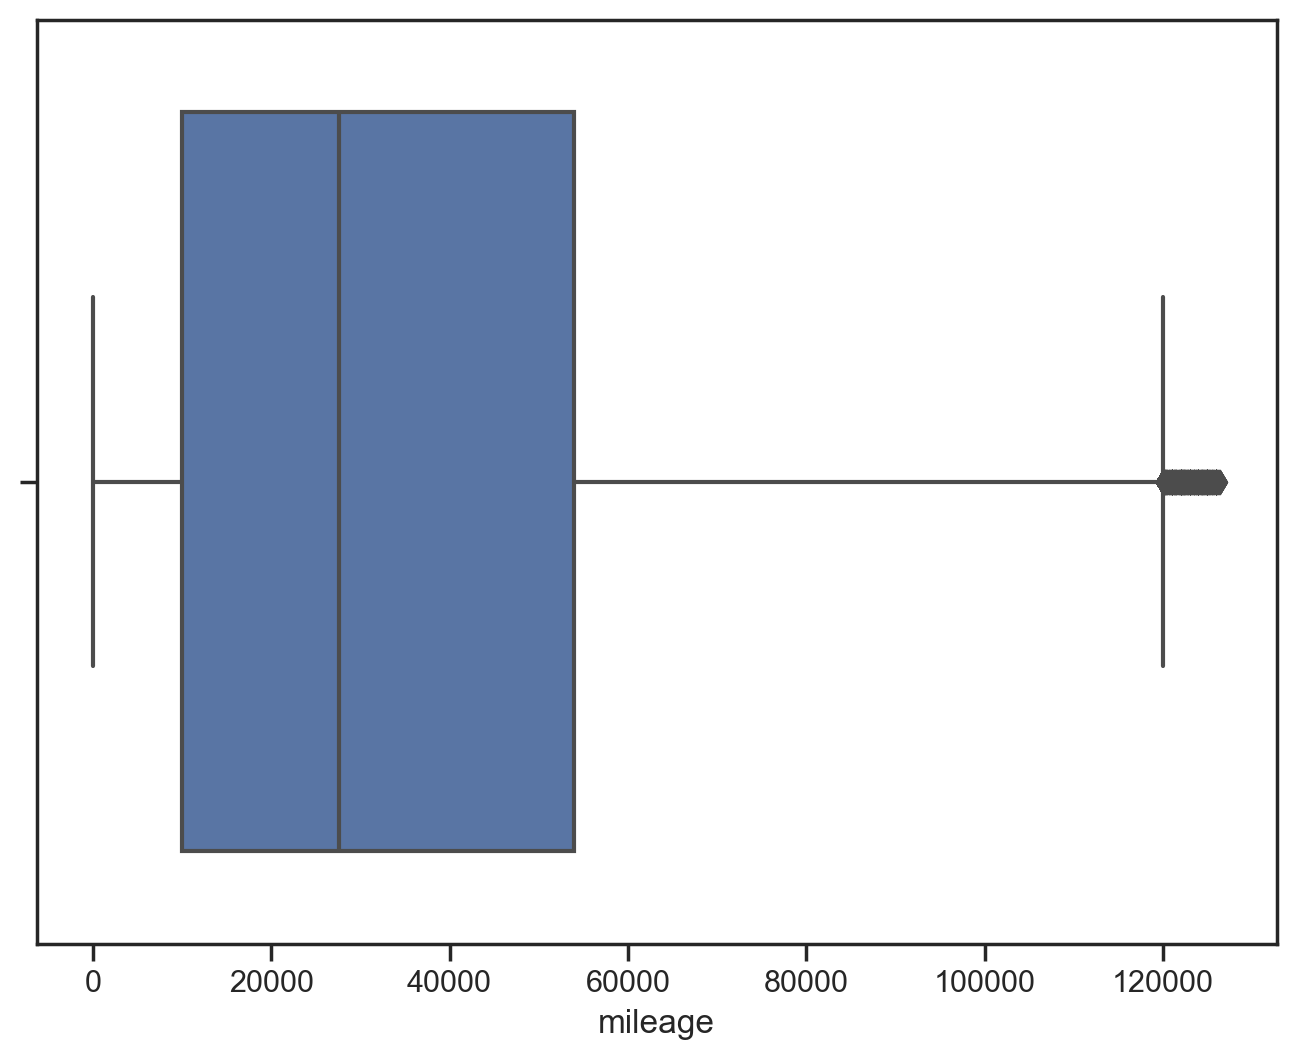

In [41]:
sns.boxplot(car_mileage['mileage'])     

# Dealing with missing values - Registration Codes (New Cars)

In [42]:
new_reg = (cars.loc[(cars['vehicle_condition']=='NEW') # Create a subset for New cars
            & (cars['reg_code'].isna())]               # Confirm if reg code is Null
                      )
new_reg.shape

(31249, 12)

In [43]:
new_reg['reg_code'] = (
    new_reg['reg_code'].fillna((new_reg['year_of_registration'] - (2000)))
                       )

cars.loc[(cars['vehicle_condition']=='NEW') & (cars['reg_code'].isna())] = new_reg     # Assign to original dataset

C:\Users\USER\AppData\Local\Temp\ipykernel_3452\2989955649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reg['reg_code'] = (


# Dealing with missing values - Registration Codes (used Cars)

In [44]:
cars['reg_code'].isna().sum()

608

In [45]:
cars['reg_code'] = cars['reg_code'].fillna(cars['reg_code'].mode()[0])

In [46]:
cars['reg_code'].unique()

array([21, '61', '17', '16', '64', '13', '8', '19', '60', '69', '66',
       '12', '18', '65', '9', 'B', '10', '14', '3', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '5', '59', '58', 'W', '2',
       '57', '6', '52', '53', '4', 'J', '7', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

In [47]:
# Replace alphanumeric codes with the number 0. 
# This is needed for easy classification of records by season of registration
# Records with alphanumeric reg codes refers to cars registered before 2001 
# and are less than 5% of the original dataset

reg_code= ['B', 'W', 'J', 'X', 'D', 'S', 'Y', 'H', 'K', 'E', 'L', 'V', 'M', 
'G', 'T', 'N', 'P','A','F', 'R', 'C', 'CA', 'm', 'FW', '723xuu', 's','k', 'p']

cars['reg_code'] = cars['reg_code'].replace(reg_code, '0')
cars['reg_code'] = cars['reg_code'].astype(int)
# cars['reg_code'].unique()

# Dealing with missing values for categorical Using Pipeline & Transformers

In [48]:
categorical_features = ["standard_colour", "body_type", "fuel_type"]
categorical_transformer = Pipeline (
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")), 
            ]
)
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder='passthrough',
    verbose_feature_names_out = False
).set_output(transform = "pandas")
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['standard_colour', 'body_type',
                                  'fuel_type'])],
                  verbose_feature_names_out=False)

In [50]:
cars = preprocessor.fit_transform(cars)

In [51]:
cars.isna().sum()

standard_colour          0
body_type                0
fuel_type                0
public_reference         0
mileage                  0
reg_code                 0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
crossover_car_and_van    0
dtype: int64

# 2.2     Feature Engineering, Data Transformations

# 2.2.1     Mileage Rating - Grouping of records by mileage

In [52]:
# Create a function to categorize advertised cars according to their mileage

# Excellent  (0 - 20000)
# Good       (20,001 - 100,000)
# average    (100,001 - 200,000)
# Poor       (201,001 - 300,000)
# Very Poor  (Above 300,000)
             
def mileage_rating (mileage):
    
    if mileage <= 20000:
        rating = 'Excellent'
    elif mileage >= 20001 and mileage <= 100000:
        rating = 'Good' 
    elif mileage >= 100001 and mileage <= 200000:
        rating = 'Average'
    elif mileage >= 200001 and mileage <= 300000:
        rating = 'Poor'
    else:
        rating = 'very poor'
    return rating

In [53]:
cars['mileage_rating'] = cars['mileage'].apply(mileage_rating)
# cars.head()

In [54]:
cars['mileage_rating'].value_counts(normalize=True)

Good         0.549239
Excellent    0.390366
Average      0.059547
Poor         0.000771
very poor    0.000077
Name: mileage_rating, dtype: float64

# 2.2.2     Price Scale - Grouping of records by price

In [55]:
# Create categorical feature by grouping records according to their respective prices. 
# The following categories apply:
# Class 1 refers to the least expensive cars while Class 5 are the most expensive cars. 
# It is an Ordinal categorical datatype as is the case with mileage rating

# Class 1 (0 - 10,000)
# Class 2 (10,001 - 20,000)
# Class 3 (20,001 - 50,000)
# Class 4 (50,001 - 100,000)
# Class 5 (Above 100,000)

bins=[0, 10000, 20000, 50000, 100000, 10000000]

scale = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

cars['price_scale']=pd.cut(cars['price'],bins,labels=scale,right=False,include_lowest=True)

In [56]:
cars['price_scale'].value_counts(normalize=True)

Class 1    0.383525
Class 2    0.366227
Class 3    0.212510
Class 4    0.030694
Class 5    0.007045
Name: price_scale, dtype: float64

# 2.2.3     Registration Season - Grouping of records by reg code

In [57]:
# Create a function to categorize cars according to their period of registration
# Spring / Summer: Cars registered between March & August with reg_code <= 50
# Autumn / Winter: Cars registered between September & February, reg_code > 50 & <=100
             
def reg_season (reg_code):
    
    if reg_code <= 50:
        season = 'Spring / Summer'
        
    elif reg_code >= 51 and reg_code <= 100:
        season = 'Autumn / Winter'
        
    else:
        season = 'Unknown'

    return season

In [58]:
cars['reg_season'] = cars['reg_code'].apply(reg_season)
# cars.head()

In [59]:
cars['reg_season'].value_counts(normalize=True)

Spring / Summer    0.537861
Autumn / Winter    0.462139
Name: reg_season, dtype: float64

# 2.2.4     Car age and age classification

In [60]:
# Compute car age by subtracting year of registration from current year (2022)
cars['car_age'] = (2022 - (cars['year_of_registration']))

In [61]:
# Create bands / bins on the basis of the price of respective car adverts.
# Very New (0 - 2 years)
# New      (3 - 5 years)
# Average  (6 - 10 years)
# Old      (11 - 15 years)
# Very Old (16 - 25 years)

bins = [0, 2, 5, 10, 15, 150]

scale = ['Very New', 'New', 'Average', 'Old', 'Very Old']

cars['age_category']=pd.cut(cars['car_age'],bins,labels=scale,right=False,include_lowest=True)

In [62]:
cars['age_category'].value_counts(normalize=True)

Average     0.463064
New         0.264223
Old         0.136968
Very New    0.077733
Very Old    0.058012
Name: age_category, dtype: float64

# 2.2.5  Brexit Sale Price and Volume

In [63]:
# Create bands / bins on the basis of the year of registration of respective car adverts
# Pre Brexit   (2001 - 2019)
# Post Brexit  (2020 -2022)

bins = [0, 2020, 2023]

scale = ['Pre Brexit', 'Post Brexit']

cars['Brexit_Sale']=pd.cut(cars['year_of_registration'],bins,labels=scale,right=False,include_lowest=True)

# 2.3     Subsetting (e.g., Feature Selection, Data Sampling)

In [64]:
# Take a subset of data with year of registration greater than or equal to 2010

cars_2010 = cars.query("year_of_registration >=2010")

In [69]:
cars_2010.shape  # This contains about ninety percent (90%) of the entire dataset

(362376, 18)

In [65]:
# Group by Fuel Type 

# Take an aggregation of price and mileage for cars registered year 2010 and beyond

cars_2010.groupby('fuel_type')[['mileage', 'price']].agg(['min', 'max', 'mean'])

mileage                         price           \
                          min       max          mean   min      max   
fuel_type                                                              
Bi Fuel                   0.0   74000.0   2647.257282  5750    69995   
Diesel                    0.0  999999.0  44590.557139   299  1000000   
Diesel Hybrid             0.0  205000.0  14902.601050  4980    82175   
Diesel Plug-in Hybrid     0.0  110690.0  20564.302703  9850    67035   
Electric                  0.0  150000.0  10567.677513  4250   174995   
Petrol                    0.0  788072.0  24367.320275   389  9999999   
Petrol Hybrid             0.0  336472.0  23545.499035   950  2049950   
Petrol Plug-in Hybrid     0.0  148300.0  19968.371591  5750  2695000   

                                     
                               mean  
fuel_type                            
Bi Fuel                15462.733010  
Diesel                 17473.417612  
Diesel Hybrid          40469.160371  
Diesel Plug-in Hybrid  35633.691892  
Electric               32752.126072  
Petrol                 17956.875756  
Petrol Hybrid          20679.983707  
Petrol Plug-in Hybrid  35986.686851

In [66]:
# Group by Fuel body 

# Take an aggregation of price and mileage of cars registered year 2010 and beyond

cars_2010.groupby('body_type')[['mileage', 'price']].agg(['min', 'max', 'mean'])

mileage                           price           \
                      min       max           mean    min      max   
body_type                                                            
Camper              110.0  150000.0   39565.111111   4990    79990   
Car Derived Van  103000.0  193000.0  148000.000000   3995    10495   
Chassis Cab       18400.0   18400.0   18400.000000  19750    19750   
Combi Van             0.0  360000.0   53109.530303    995   180000   
Convertible           0.0  740000.0   30619.177442    995  9999999   
Coupe                 0.0  196050.0   35605.432521   1450  9999999   
Estate                0.0  388000.0   43657.798232    550   154990   
Hatchback             0.0  999999.0   31862.232831    299  3799995   
Limousine            19.0  185000.0   65875.162500   6611   374950   
MPV                   0.0  336472.0   37496.212584    450  1000000   
Minibus              10.0  355000.0   57300.042857   3200   109900   
Panel Van            50.0  178000.0   68529.584906   3950    66000   
Pickup                0.0  180000.0   40507.182422   3250   265000   
SUV                   0.0  788072.0   26657.844085    950   369000   
Saloon                0.0  307426.0   40829.253630    995   999999   
Window Van         9800.0  230000.0   71663.606061   4900    44995   

                               
                         mean  
body_type                      
Camper           39595.074074  
Car Derived Van   7245.000000  
Chassis Cab      19750.000000  
Combi Van        19609.444444  
Convertible      32803.066891  
Coupe            38147.431167  
Estate           17316.761795  
Hatchback        11485.285570  
Limousine        88036.225000  
MPV              12675.786413  
Minibus          21250.650000  
Panel Van        19671.056604  
Pickup           22347.257937  
SUV              23094.745622  
Saloon           21152.908041  
Window Van       12941.727273

# 2.3.2  Pre and Post-Brexit Sale

In [67]:
# Subset of cars registered between 2018 and 2021. Last two years before & after Brexit
# 2018 - 2019, cars registered Pre-Brexit,  2020 - 2021, cars registered Post Brexit
# Then compared if there is any significant different between volume & average price

# Observed the average price of cars increased Post=Brexit over the period in question
# The number of cars sold / registered also declined significantly Post-brexit

In [68]:
brexit = cars.query("year_of_registration >= 2018")

<AxesSubplot:xlabel='Brexit_Sale'>

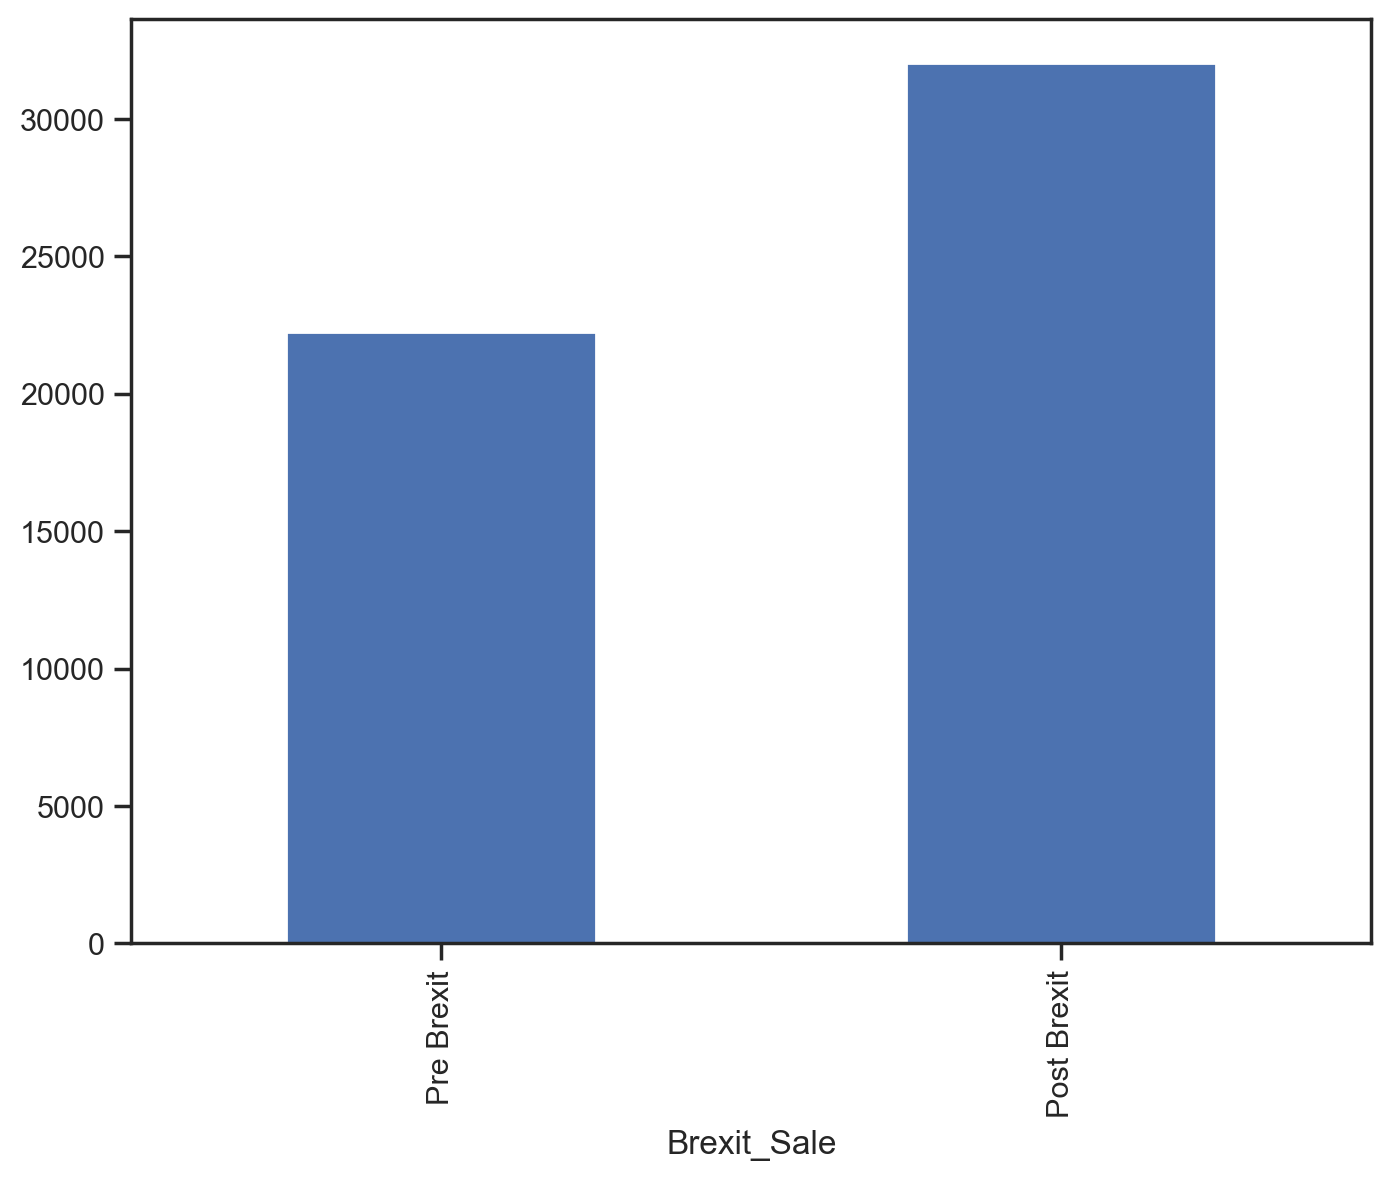

In [69]:
brexit.groupby('Brexit_Sale')['price'].mean().plot.bar() #Average car price pre & post Brexit

<AxesSubplot:xlabel='Brexit_Sale'>

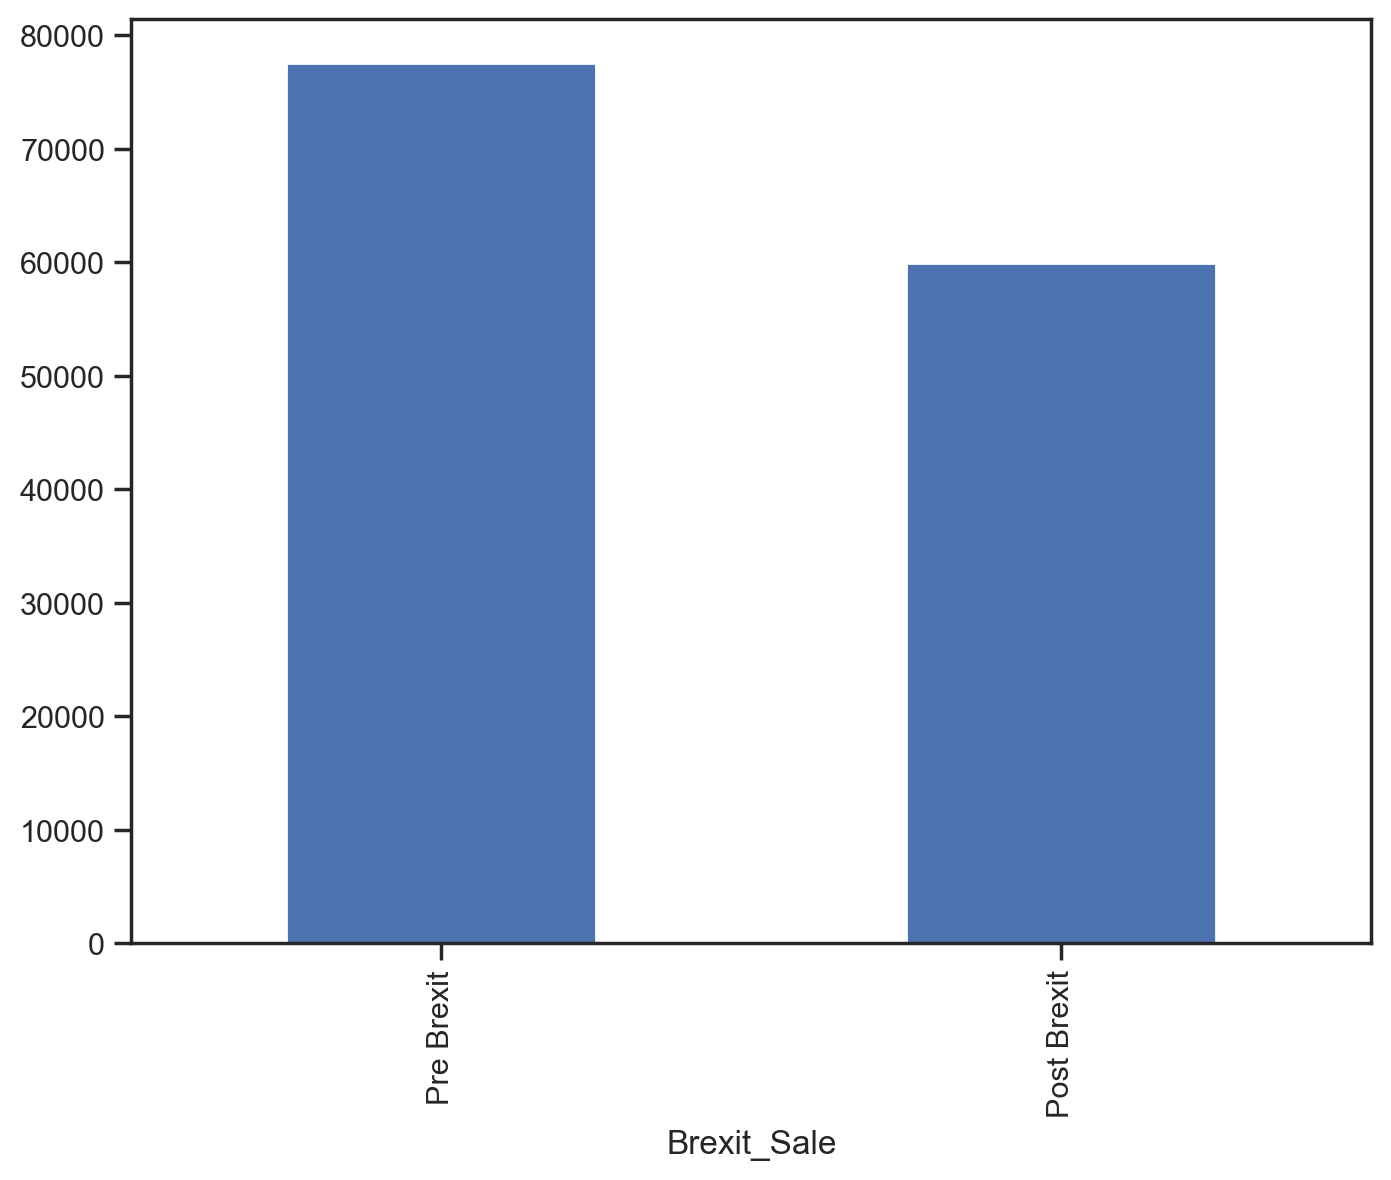

In [70]:
brexit.groupby('Brexit_Sale').size().plot.bar()  # Volume of cars sold / registered

# 3.0     Association and Group Differences Analysis

# 3.1     Quantitative-Quantitative (1-2)

# 3.1.1 Price v Registration Year

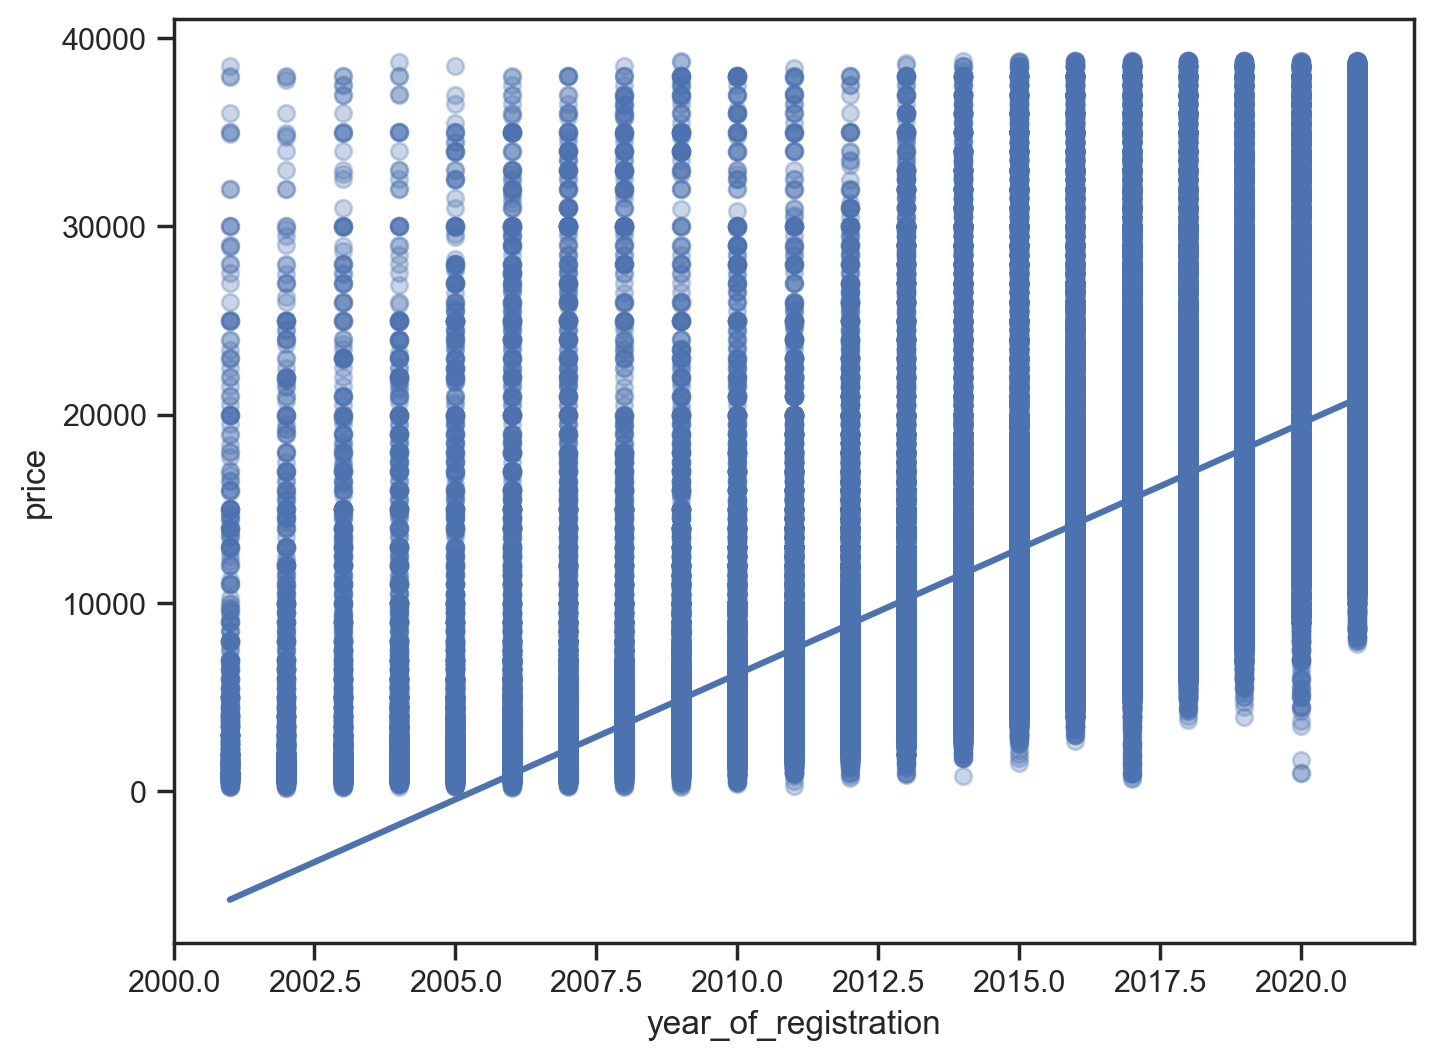

In [71]:
sns.regplot(data=car_price,x='year_of_registration',
            y='price',scatter_kws=dict(alpha=0.3));

# 3.1.2 Mileage v Registration Year

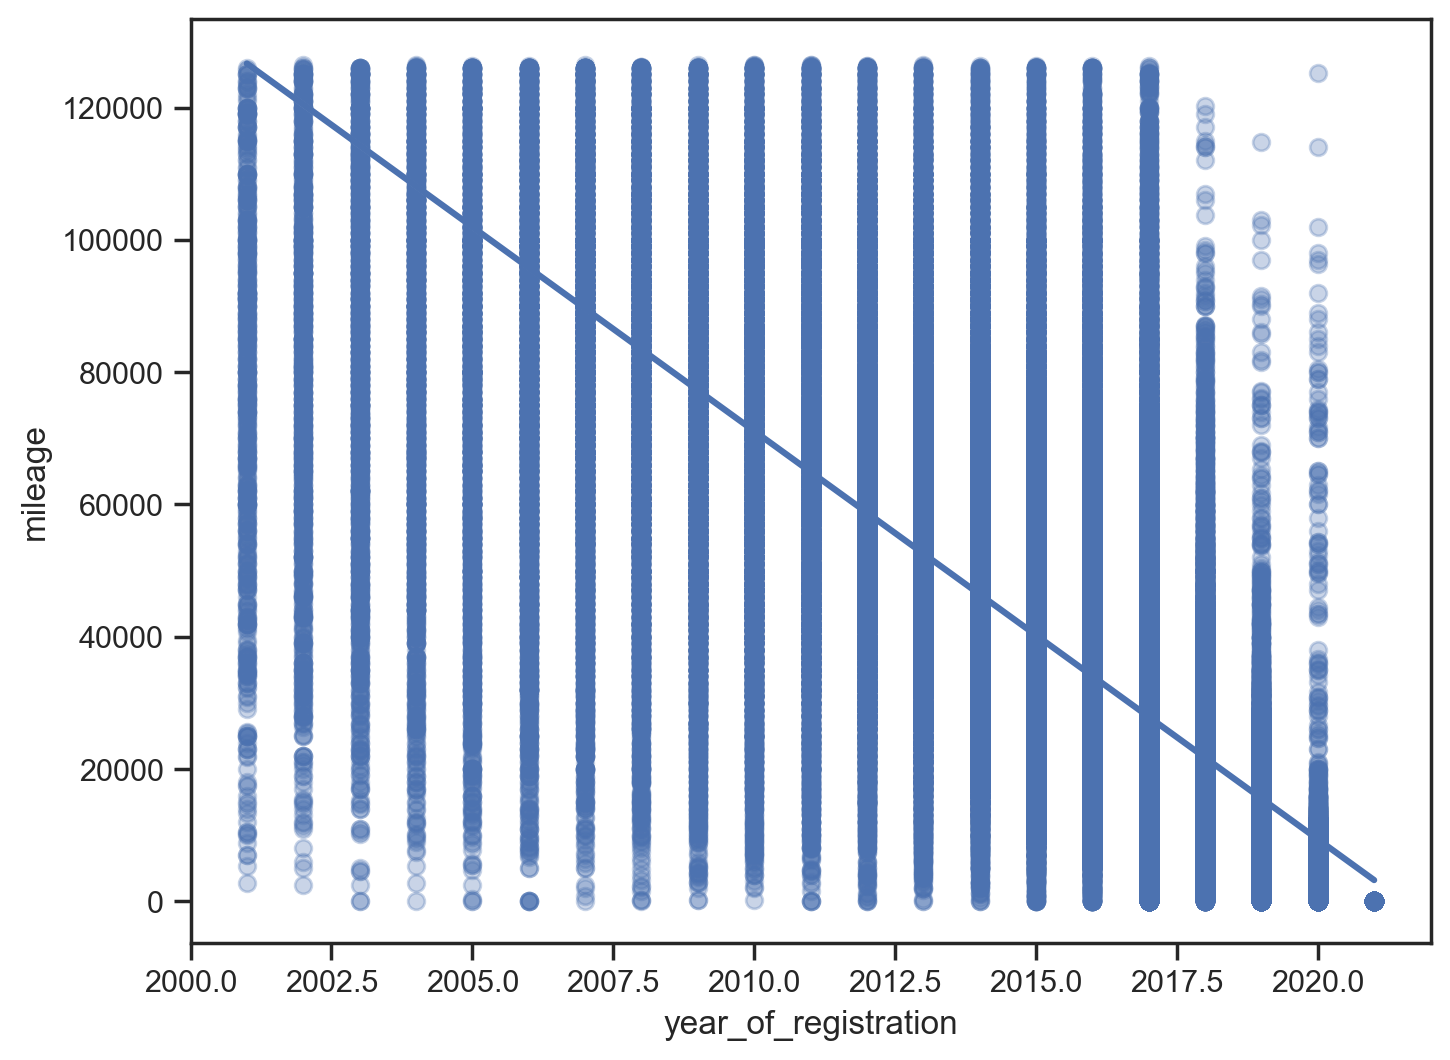

In [72]:
sns.regplot(data=car_mileage, x='year_of_registration',
            y='mileage', scatter_kws=dict(alpha=0.3));

# 3.2     Quantitative-Categorical (1-2)

# 3.2.1  Fuel Type vs Price

<AxesSubplot:xlabel='fuel_type'>

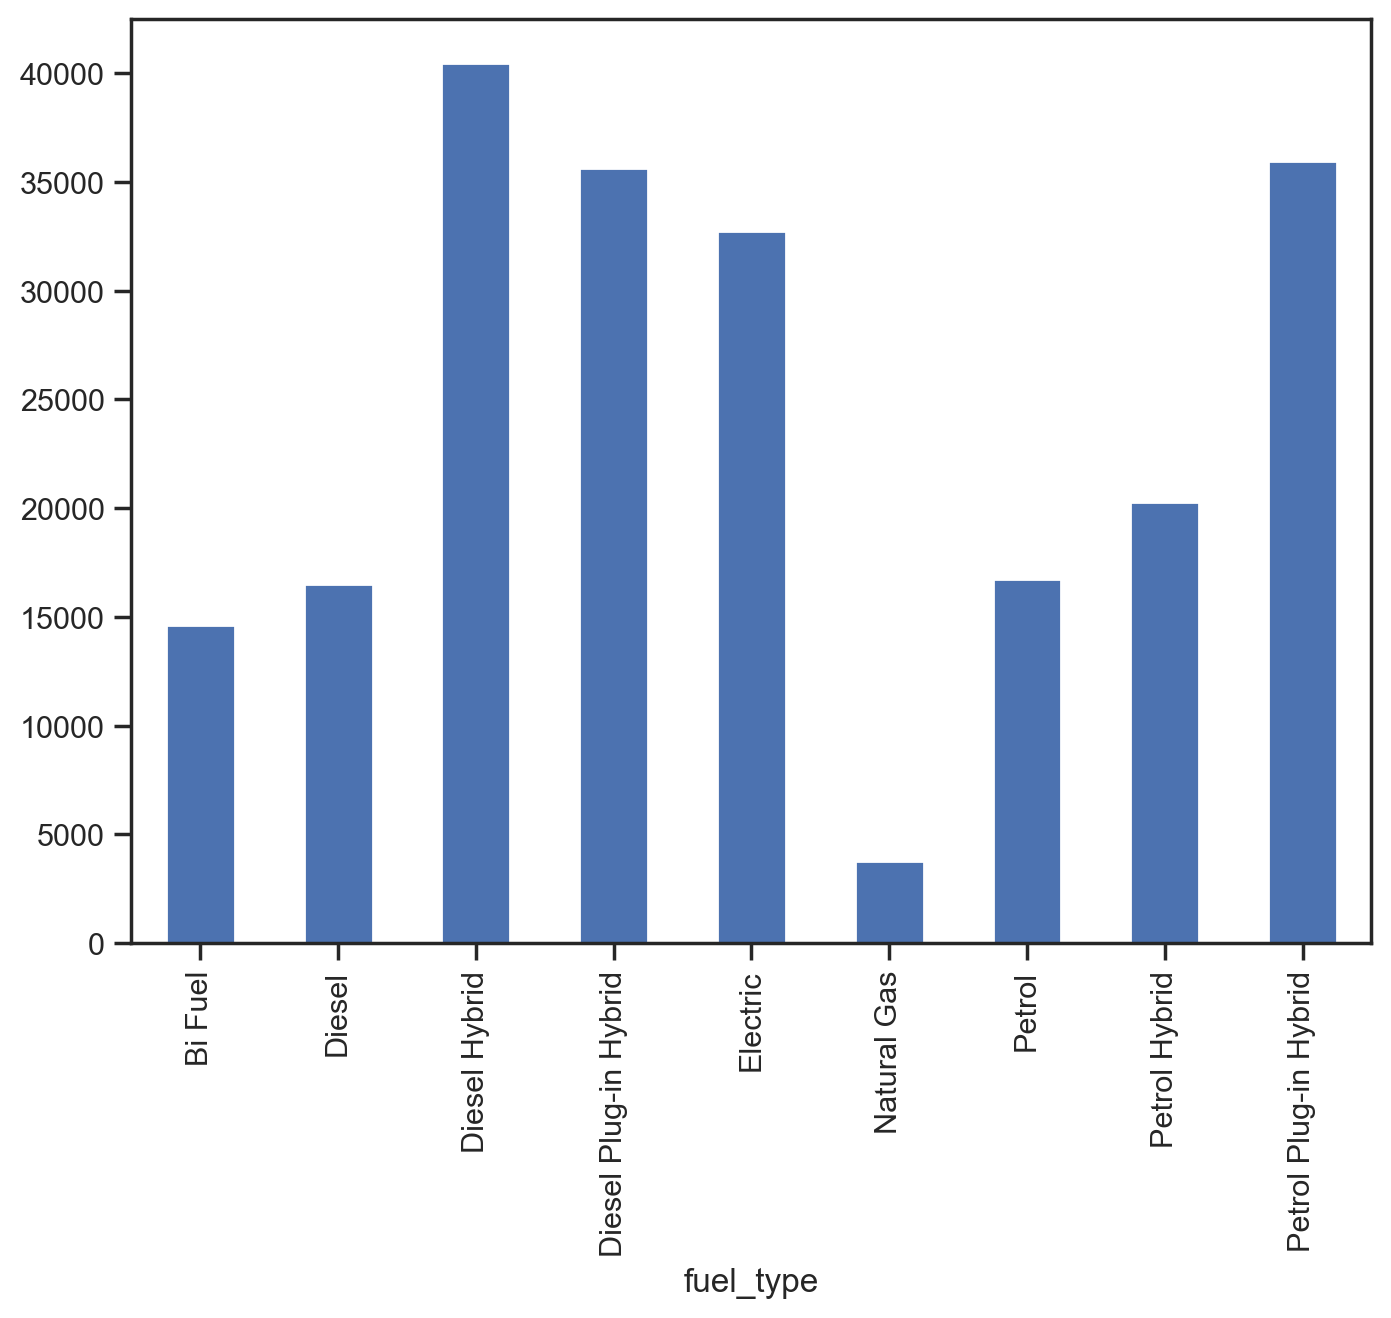

In [73]:
# Hybrid cars (Powered by fuel & batteries) & Electric cars are the most expensive
# As additional equipment (electric motor & high-voltage battery) are ired to build them 
# These includes DieselHybrid,Diesel plug-in,Electric,Petrolhybrid & Petrol plug-in hybrid

cars.groupby('fuel_type')['price'].mean().plot.bar()

# 3.2.2    Mileage Rating v Price

<AxesSubplot:xlabel='mileage_rating'>

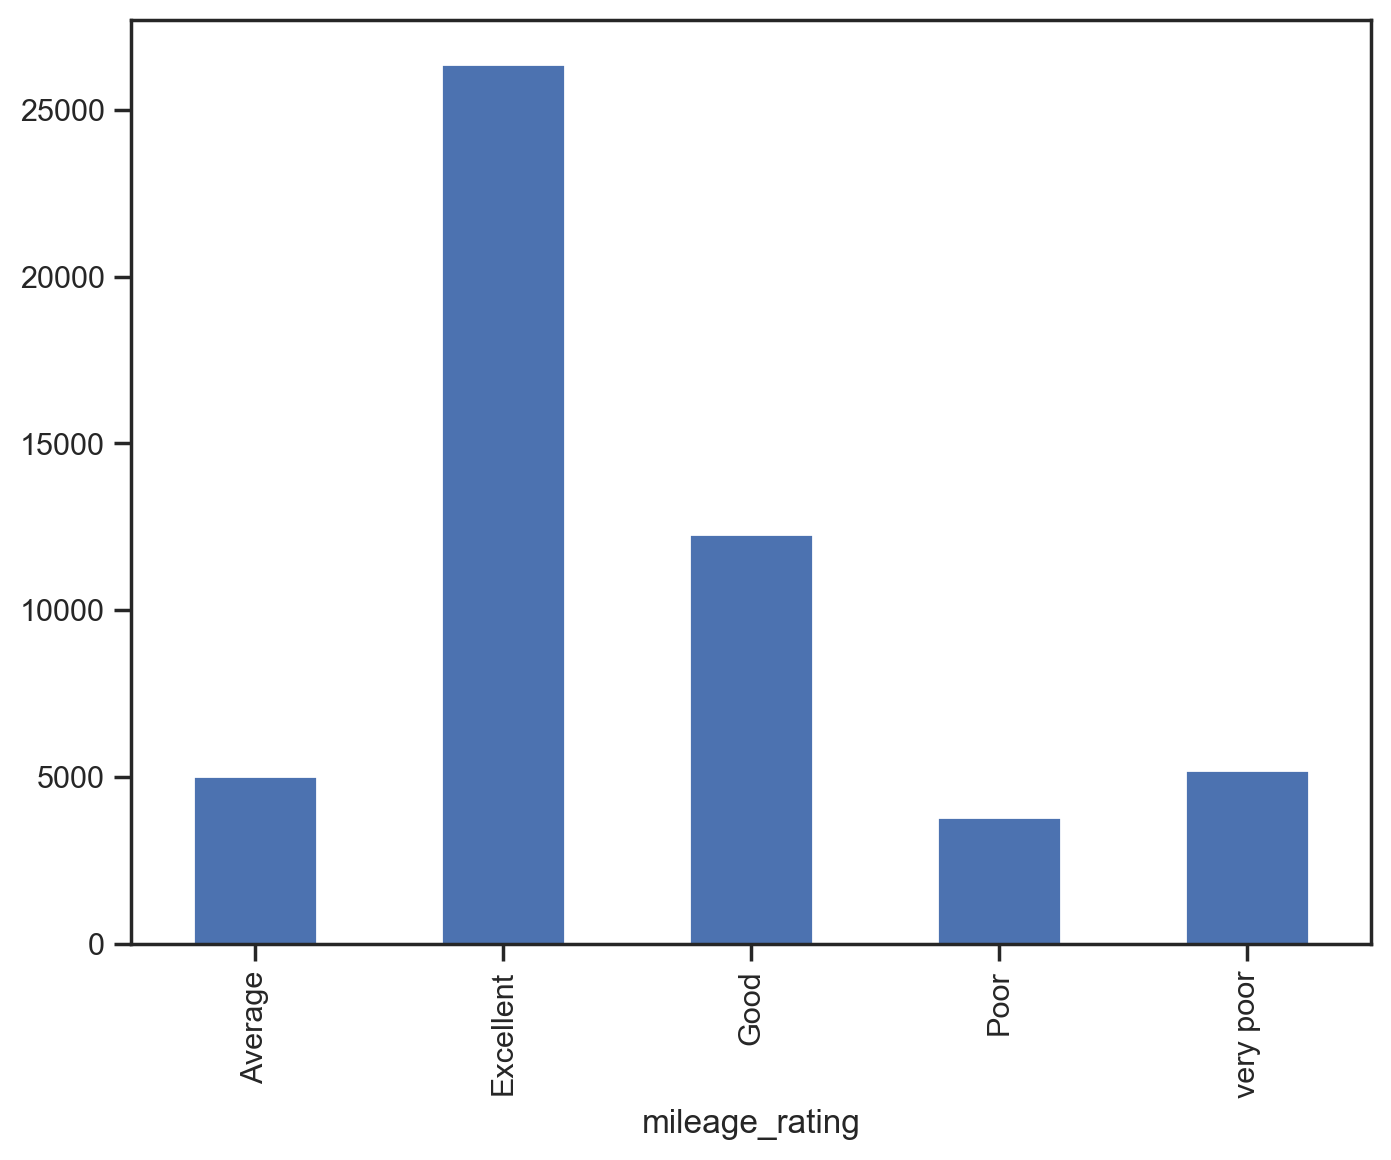

In [74]:
cars.groupby('mileage_rating')['price'].mean().plot.bar()

# 3.2.2     Registration Season vs Price

<AxesSubplot:xlabel='reg_season'>

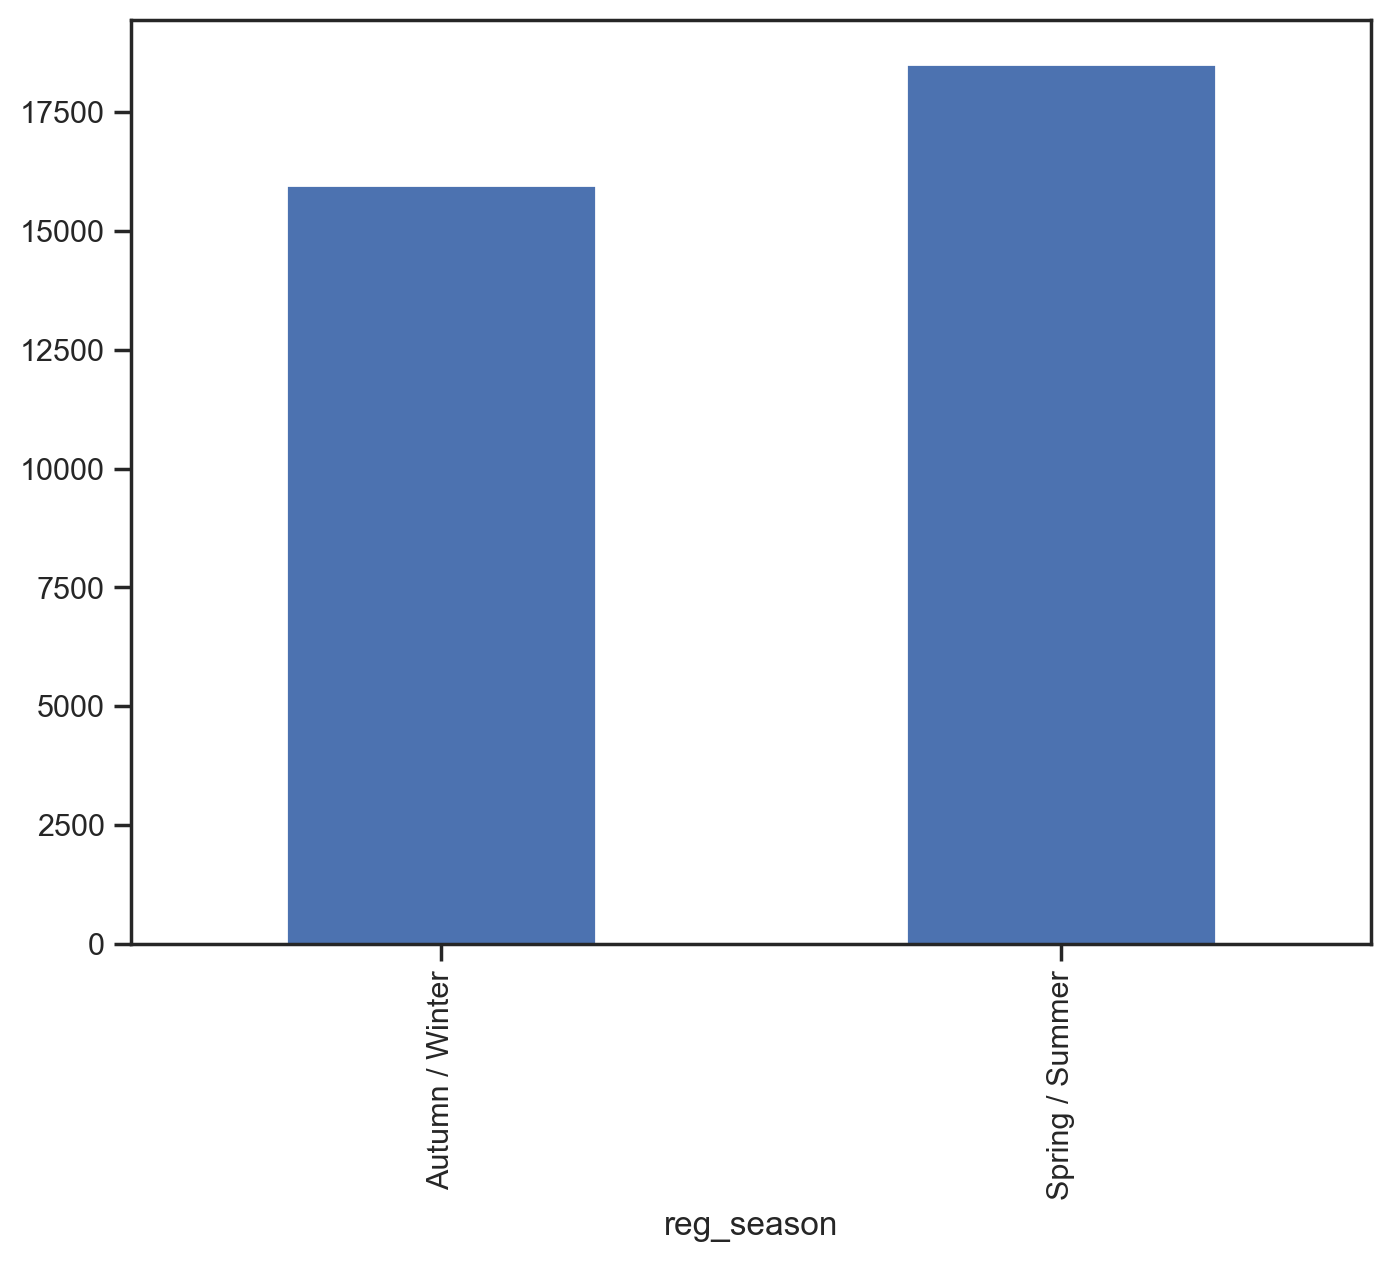

In [75]:
cars.groupby('reg_season')['price'].mean().plot.bar()

# 3.2.2 Body Type vs Price

<AxesSubplot:xlabel='body_type'>

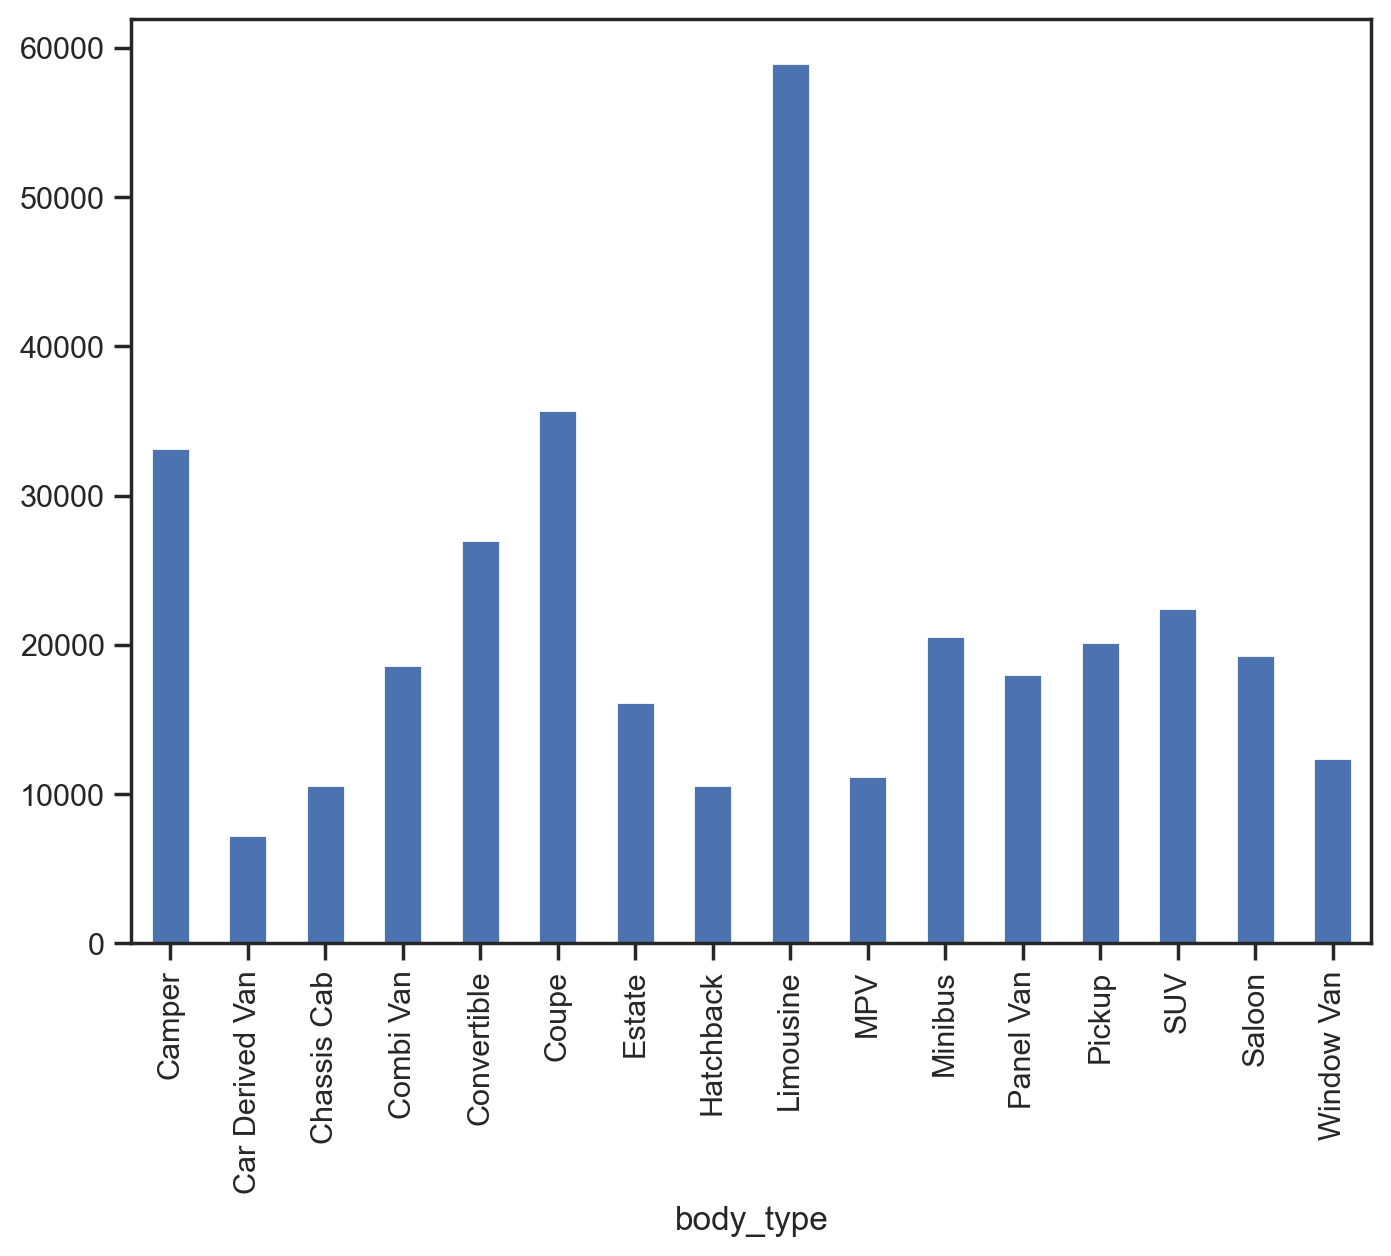

In [76]:
cars.groupby('body_type')['price'].mean().plot.bar()

<AxesSubplot:xlabel='standard_colour'>

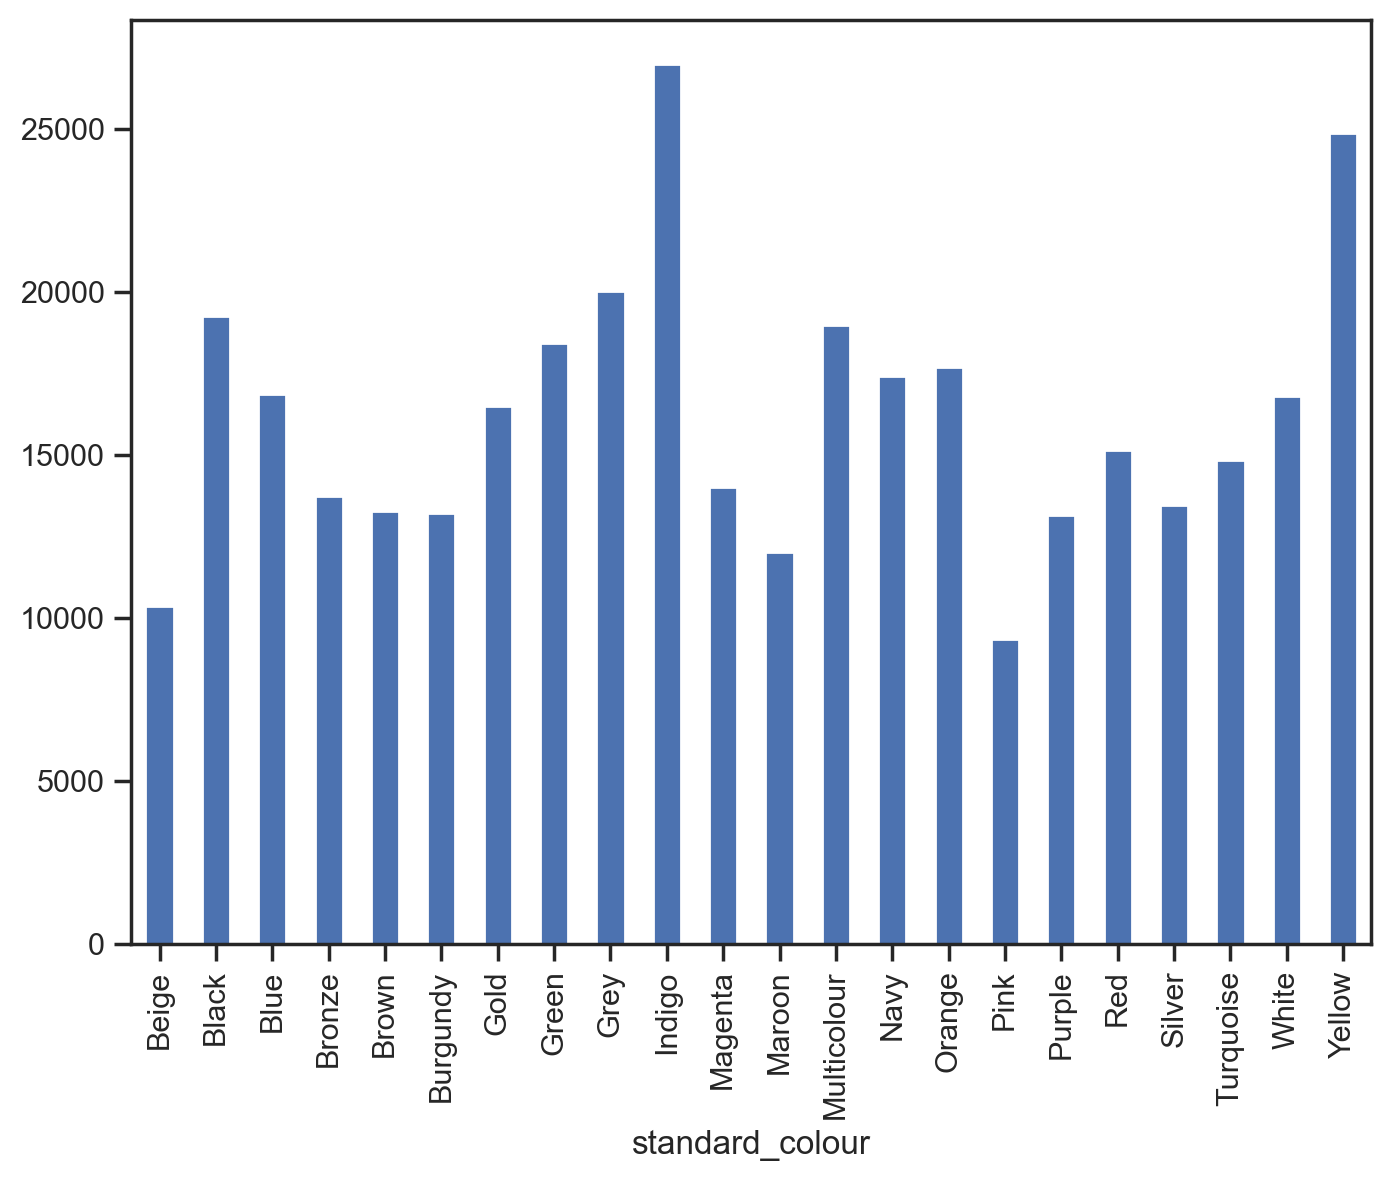

In [77]:
cars.groupby('standard_colour')['price'].mean().plot.bar()

# 3.3  Categorical - Categorical Features

# 3.3.1 Mileage Rating, Registration Season v Price

<AxesSubplot:xlabel='mileage_rating'>

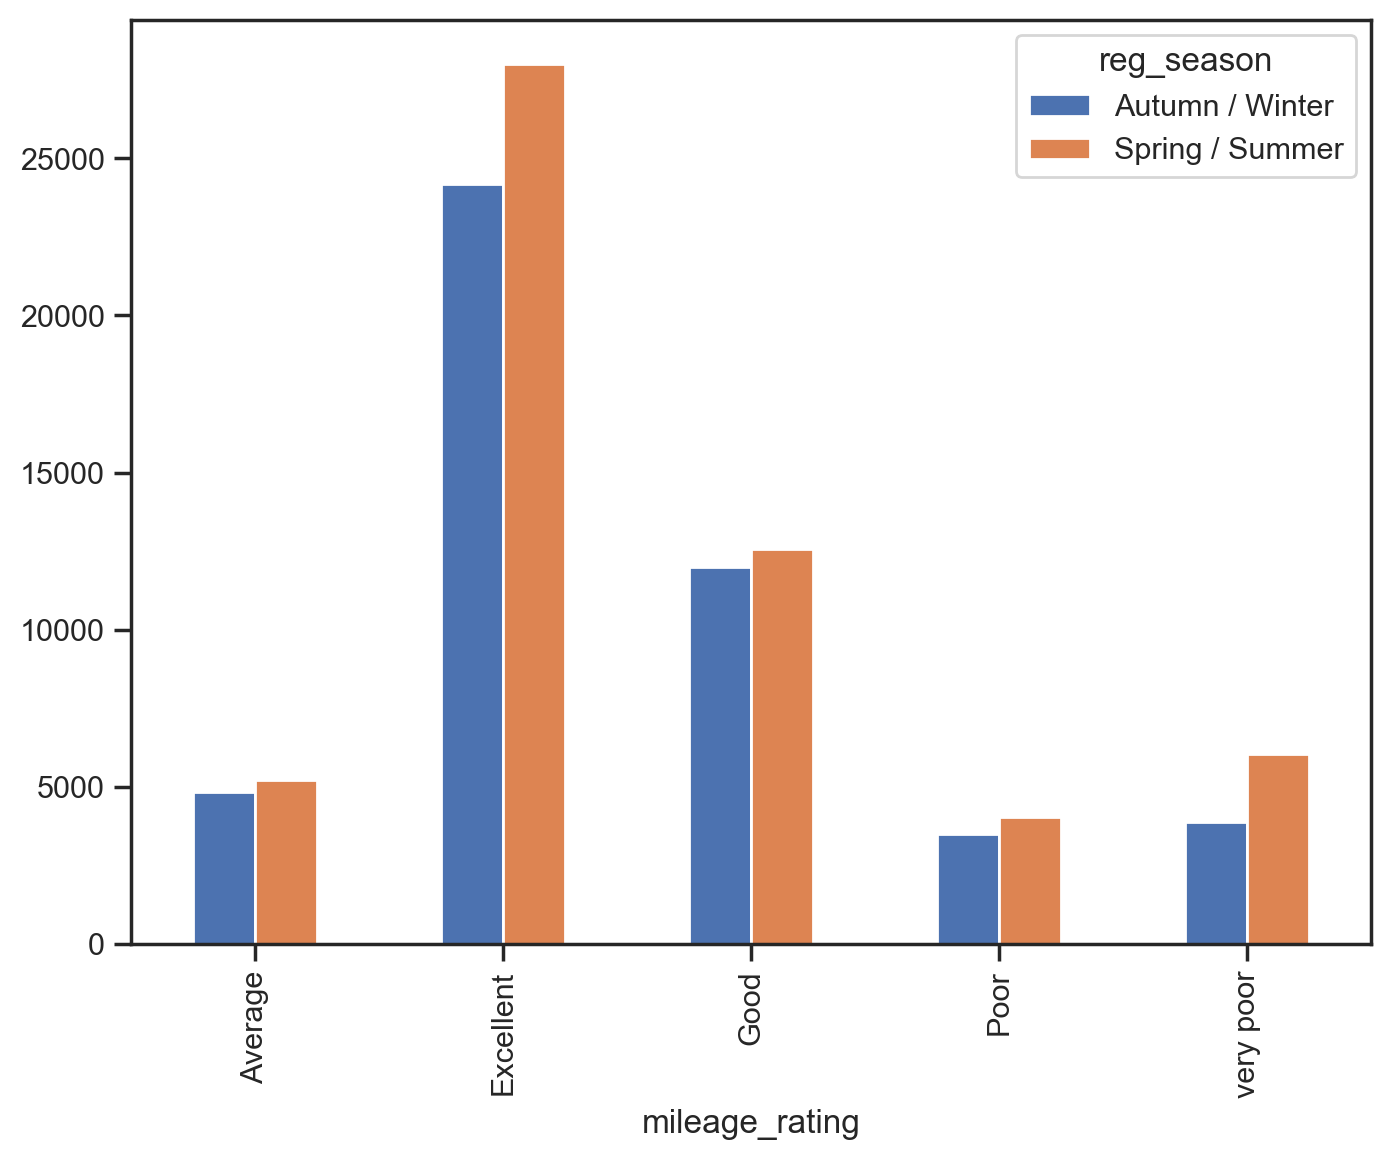

In [78]:
cars.groupby(['mileage_rating', 'reg_season'])['price'].mean().unstack().plot.bar()

# 3.3.2     MIleage Rating, Price Scale v Price

<AxesSubplot:xlabel='price_scale'>

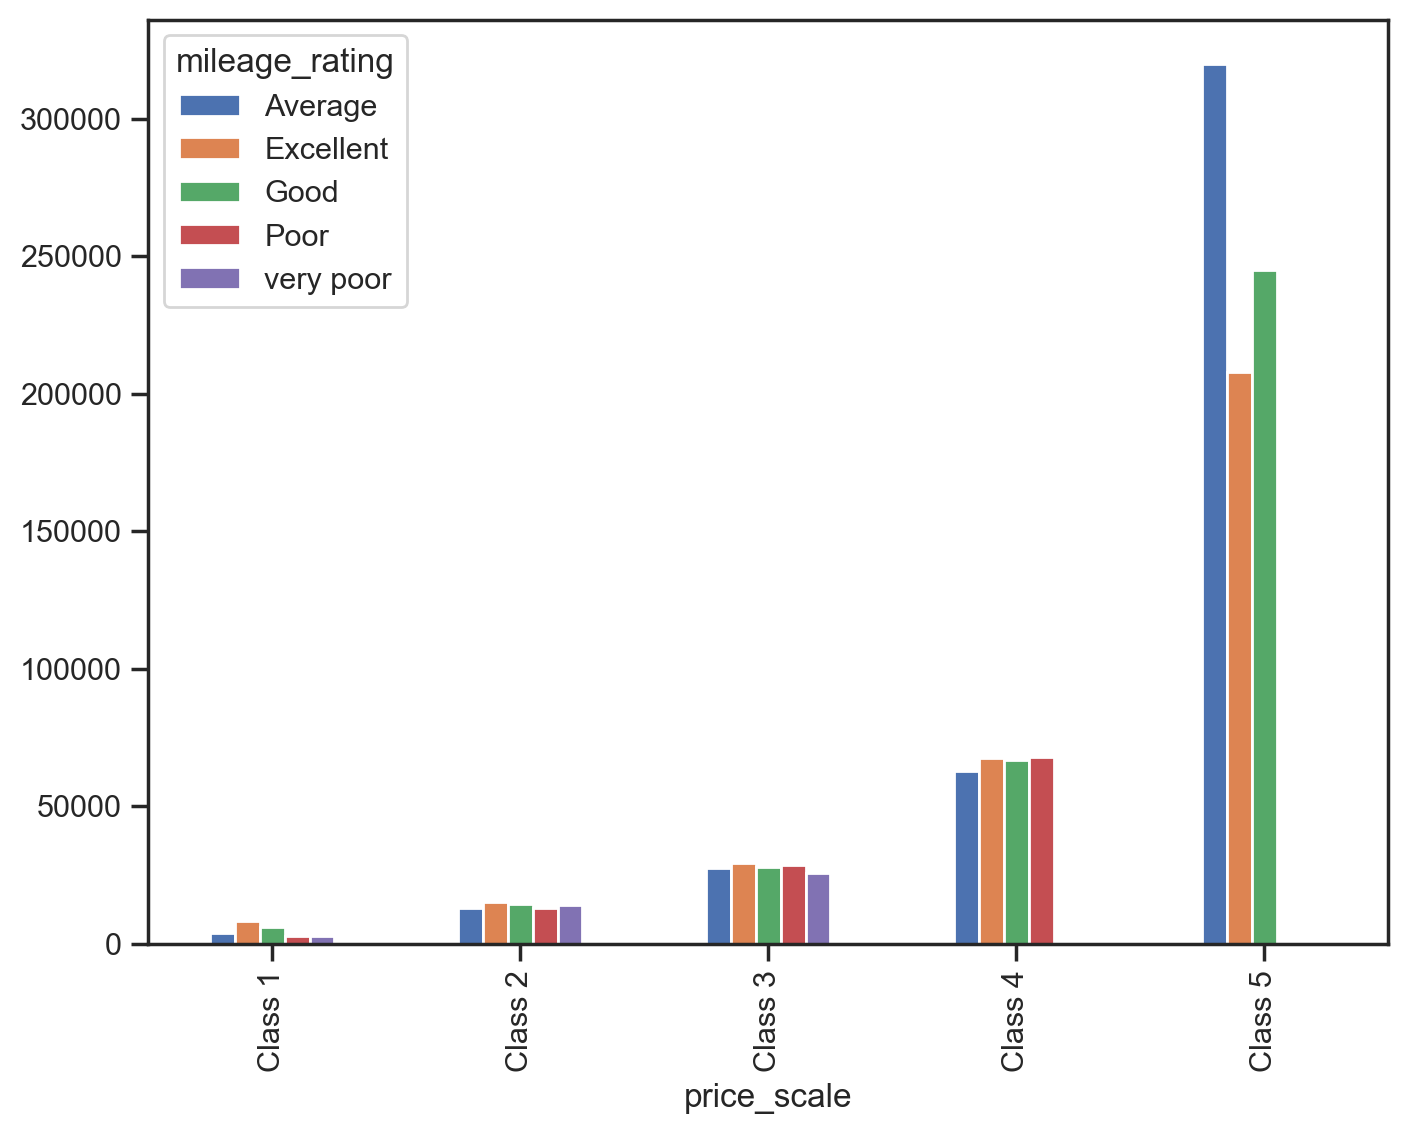

In [79]:
cars.groupby(['price_scale', 'mileage_rating'])['price'].mean().unstack().plot.bar() 

<AxesSubplot:xlabel='body_type'>

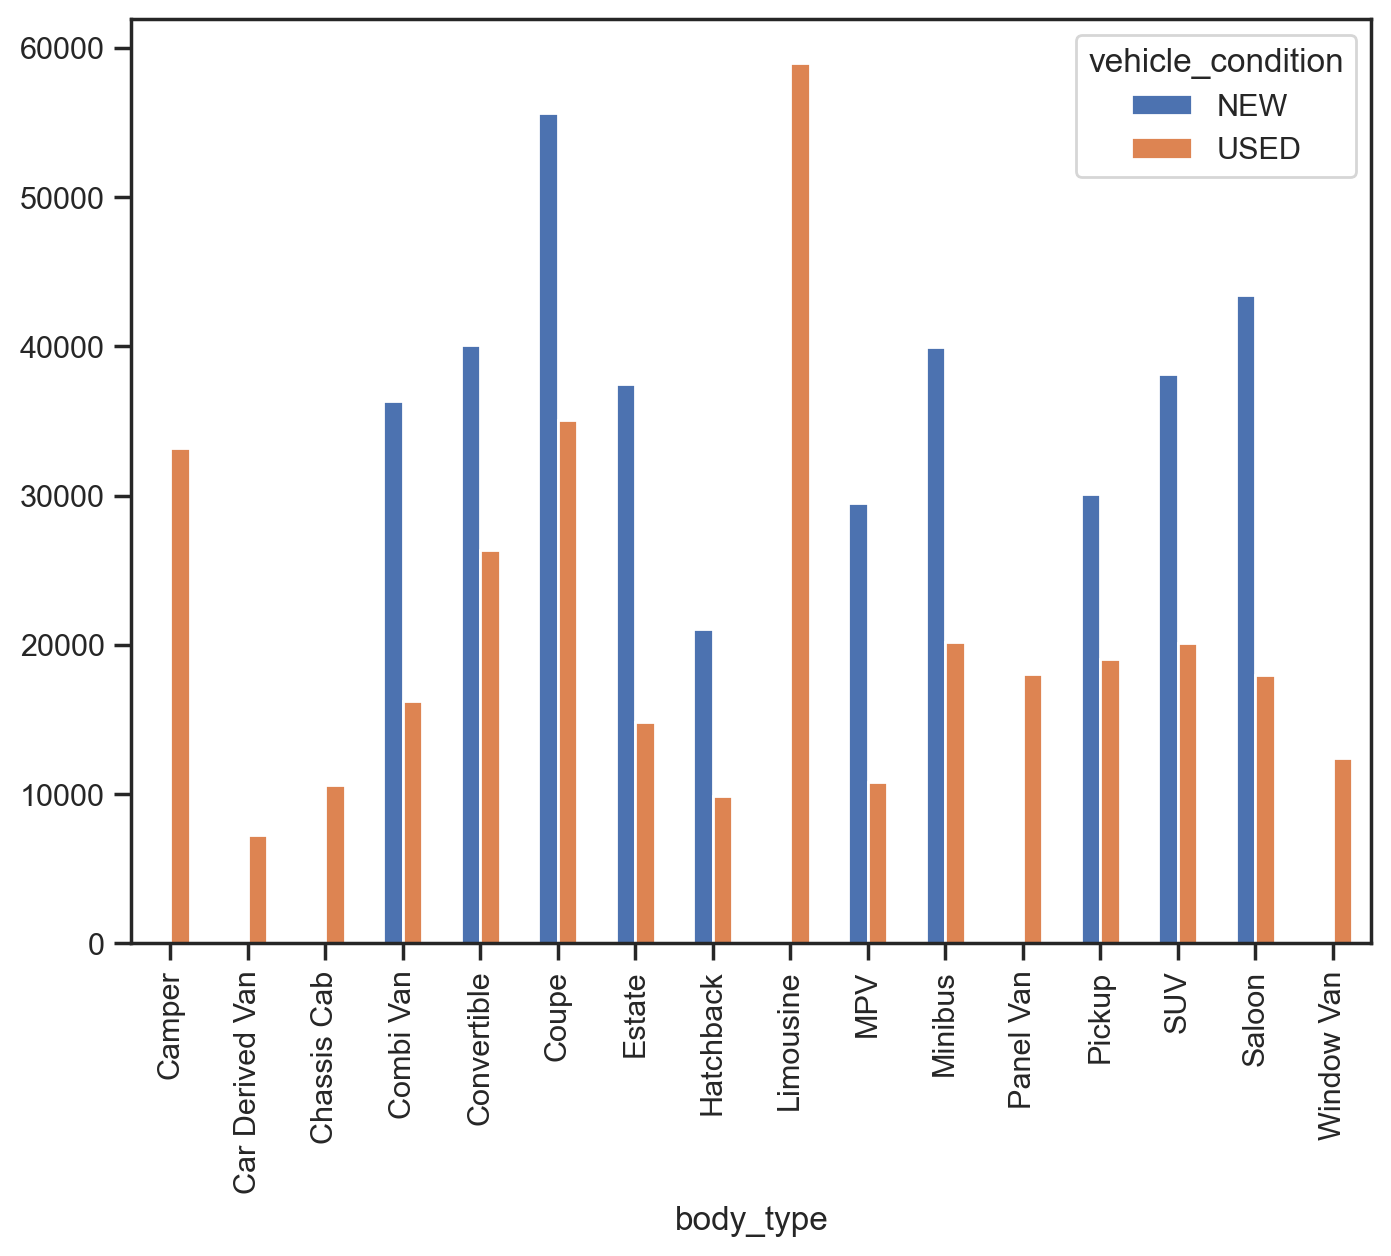

In [80]:
(cars.groupby(['body_type', 'vehicle_condition'])['price'].mean()
 .unstack('vehicle_condition').plot.bar()
)